In [4]:
import h5py 

# 获得坐标

In [5]:
from pyproj import Proj,transform
import math

def WGS84_CGCS2000(lon,lat,degree_type,is_zone_number):

    '''
    :param lon: 经度
    :param lat: 纬度
    :param degree_type:3度带或者6度带
    :param is_zone_number: 生成坐标是否包含带号
    :return:
    '''

    if int(lon)<75 or int(lon)>135:
        print('该区域不在中国境内')
    else:
        if degree_type==3:
            if is_zone_number==True:
                zone=math.floor( (lon-1.5)/3 )+1
                Epsg_test='45{0}'.format(str(zone-12) )
                p1 = Proj(init='epsg:4326')
                p2 = Proj(init='epsg:{0}'.format(Epsg_test))
                x, y = p1(lon,lat)
                x_prj, y_prj = transform(p1, p2, x, y)
                x_prj=int(x_prj)
                y_prj=int(y_prj)

            elif is_zone_number==False:
                zone=math.floor( (lon-1.5)/3 )+1
                Epsg_test = '45{0}'.format(str(zone+9))
                p1 = Proj(init='epsg:4326')
                p2 = Proj(init='epsg:{0}'.format(Epsg_test))
                x, y = p1(lon,lat)
                x_prj, y_prj = transform(p1, p2, x, y)
                x_prj=int(x_prj)
                y_prj=int(y_prj)

        elif degree_type==6:

            if is_zone_number==True:
                zone=math.floor(lon/6)+1
                epsg=str(4490+zone-12)
                p1 = Proj(init='epsg:4326')
                p2 = Proj(init='epsg:{0}'.format(epsg))
                x, y = p1(lon,lat)
                x_prj, y_prj = transform(p1, p2, x, y)
                x_prj=int(x_prj)
                y_prj=int(y_prj)

            elif is_zone_number==False:

                zone = math.floor(lon / 6) + 1
                epsg=4500+zone-11
                p1 = Proj(init='epsg:4326')
                p2 = Proj(init='epsg:{0}'.format(epsg))
                x, y = p1(lon,lat)
                x_prj, y_prj = transform(p1, p2, x, y)
                x_prj=int(x_prj)
                y_prj=int(y_prj)

    return x_prj,y_prj

def CGCS2000_WGS84(X,Y):

    p = Proj(init='epsg:4528')
    lon,lat = p(X,Y,inverse=True)
    lon=round(lon,6)
    lat=round(lat,6)
    return lon,lat

if __name__=='__main__':
    X_DIFF = 40094019 
    Y_DIFF = 368
    x_2000, y_2000 = WGS84_CGCS2000(121.049864464,32.551416489, 3, is_zone_number=True)
    print("对应的网格坐标:", x_2000 - X_DIFF, y_2000 - Y_DIFF)
    # ID为0的坐标值
    x0 = 498149
    y0 = 3604810
    x_WGS84, y_WGS84 = CGCS2000_WGS84(x0 + X_DIFF, y0 + Y_DIFF)
    print("对应的WGS坐标:", x_WGS84, y_WGS84)

    # print(CGCS2000_WGS84(x_2000,y_2000))

/home/nandahgy/.local/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/nandahgy/.local/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_150/4273154816.py:24: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x_prj, y_prj = transform

对应的网格坐标: 504590 3603118
对应的WGS坐标: 120.981464 32.567225


/home/nandahgy/.local/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [6]:
xorigin = 498149
yorigin = 3594250

## 输入【基本变量】

In [7]:
NROW = 213
NCOL = 283
NLAY = 4
sim_name_ini = "2022.10.20-FJMFQF"
sim_ws_ini = "2022.10.20-FJMFQF_MODFLOW"

## 破解 h5、并读取边界水头chd、初始水头starthead、边界ibound

In [9]:
import h5py 
import numpy as np

f1 = h5py.File("/home/nandahgy/yqc_model/" + sim_ws_ini + "/" + sim_name_ini + ".h5",'r')

In [10]:
f2 = h5py.File("/home/nandahgy/yqc_model/" + sim_ws_ini + "/" + sim_name_ini + ".hed.h5",'r')

In [183]:
nums = list(f2['Datasets']['Head']['Values'][0])
tmp2 = []
for j in range(NLAY):
      tmp = []
      for i in range(NROW):
            tmp.append(nums[i*NCOL:(1+i)*NCOL])
      tmp2.append(tmp)
chd = np.array(tmp2)
chd.shape
# 输出测试
# chd[0,98,29]

(4, 213, 283)

In [12]:
nums = [0] * (NROW * NCOL)
idomain = np.ones((NLAY, NROW, NCOL), dtype = int) # 参与模拟的区域，1 为参与
for layi in range(NLAY):
  iboundname = 'ibound' + str(layi + 1)
  nums = list(f1['Arrays'][iboundname])
  tmp = []
  for rowi in range(NROW):
    tmp.append(nums[rowi * NCOL:(1 + rowi) * NCOL])
  idomain[layi,:,:] = np.array(tmp)

print(idomain[0,100,100])
print(idomain[1,100,100])
print(idomain[2,100,100])
print(idomain[3,100,100])

1
1
1
1


In [13]:

# 初始条件: # Initial conditions
# Starting concentrations 初始浓度
sconc = 0.0
# Starting Heads 初始水头
nums = [0] * (NROW * NCOL)
strt = np.zeros((NLAY, NROW, NCOL), dtype=float)

for layi in range(NLAY):
  StartHeadname = 'StartHead' + str(layi + 1)
  nums = list(f1['Arrays'][StartHeadname])
  tmp = []
  for rowi in range(NROW):
    tmp.append(nums[rowi * NCOL:(1 + rowi) * NCOL])
  strt[layi,:,:] = np.array(tmp)

print(strt[0,100,100])
print(strt[1,100,100])
print(strt[2,100,100])
print(strt[3,100,100])

5.0
-2.0
-18.0
-35.0


In [14]:
nums = list(f1['Arrays']['top1'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
top1 = np.array(tmp)

nums = list(f1['Arrays']['bot1'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
bot1 = np.array(tmp)

nums = list(f1['Arrays']['bot2'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
bot2 = np.array(tmp)

nums = list(f1['Arrays']['bot3'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
bot3 = np.array(tmp)

nums = list(f1['Arrays']['bot4'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
bot4 = np.array(tmp)

print("top1:",top1[100,100])
print("bot1:",bot1[100,100])
print("bot2:",bot2[100,100])
print("bot3:",bot3[100,100])
print("bot4:",bot4[100,100])

top1: 5.0
bot1: -2.0
bot2: -18.0
bot3: -35.0
bot4: -75.06968688964844


In [15]:
bottoms = np.zeros((NLAY, NROW, NCOL), dtype=float)
bottoms[0,:,:] = bot1
bottoms[1,:,:] = bot2
bottoms[2,:,:] = bot3
bottoms[3,:,:] = bot4

In [16]:

nums = list(f1['Arrays']['HK1'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
HK1 = np.array(tmp)

nums = list(f1['Arrays']['HK2'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
HK2 = np.array(tmp)

nums = list(f1['Arrays']['HK3'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
HK3 = np.array(tmp)

nums = list(f1['Arrays']['HK4'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
HK4 = np.array(tmp)

nums = list(f1['Arrays']['HANI1'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
HANI1 = np.array(tmp)

nums = list(f1['Arrays']['HANI2'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
HANI2 = np.array(tmp)

nums = list(f1['Arrays']['HANI3'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
HANI3 = np.array(tmp)

nums = list(f1['Arrays']['HANI4'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
HANI4 = np.array(tmp)

nums = list(f1['Arrays']['VANI1'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
VANI1 = np.array(tmp)

nums = list(f1['Arrays']['VANI2'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
VANI2 = np.array(tmp)

nums = list(f1['Arrays']['VANI3'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
VANI3 = np.array(tmp)

nums = list(f1['Arrays']['VANI4'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
VANI4 = np.array(tmp)

print("HK1:",HK1[100,100])
print("HK2:",HK2[100,100])
print("HK3:",HK3[100,100])
print("HK4:",HK4[100,100])
print("HANI 和 VANI 都是比值")
print("HANI1:",HANI1[100,100])
print("HANI2:",HANI2[100,100])
print("HANI3:",HANI3[100,100])
print("HANI4:",HANI4[100,100])
print("VANI1:",VANI1[100,100])
print("VANI2:",VANI2[100,100])
print("VANI3:",VANI3[100,100])
print("VANI4:",VANI4[100,100])

HK1: 3.6
HK2: 3.6
HK3: 0.0001
HK4: 4.4
HANI 和 VANI 都是比值
HANI1: 1.0
HANI2: 1.0
HANI3: 1.0
HANI4: 1.0
VANI1: 3.0
VANI2: 3.0
VANI3: 3.0
VANI4: 3.0


In [17]:
HKs = np.zeros((NLAY, NROW, NCOL), dtype=float)
HKs[0,:,:] = HK1
HKs[1,:,:] = HK2
HKs[2,:,:] = HK3
HKs[3,:,:] = HK4

In [18]:
nums = list(f1['Recharge']['07. Property'][0,:,0])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
rch = np.array(tmp)

nums = list(f1['ET']['07. Property'][0,:,0])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
et_surf = np.array(tmp)

nums = list(f1['ET']['07. Property'][1,:,0])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
et_rat = np.array(tmp)

nums = list(f1['ET']['07. Property'][2,:,0])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
et_dep = np.array(tmp)

print("rch:",rch[100,100])
print("et_surf:",et_surf[100,100])
print("et_rat:",et_rat[100,100])
print("et_dep:",et_dep[100,100])

rch: 0.000132
et_surf: 3.0
et_rat: 0.000141
et_dep: 10.0


## 绘制二维图plot

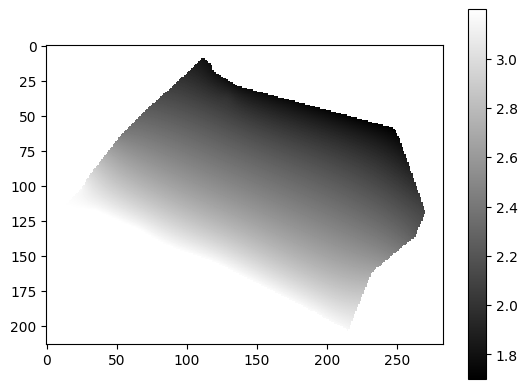

In [19]:
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy.ma as npm

mask = chd < 0
arrmask = npm.array(chd, mask=mask)

plt.imshow(arrmask[3], cmap=cm.gray)
plt.colorbar()
plt.show()

# 基于mf6的溶质运移模型(再试一遍)

https://zhuanlan.zhihu.com/p/532012679

In [20]:
# Filename
sim_ws = 'simulation_1027_A'
sim_name = 'model'          # 模拟总名称
gwfname = "gwf_" + sim_name # 渗流模型名称
gwtname = "gwt_" + sim_name # 溶质运移模型名称

In [21]:
# Units
length_units = "meters"   # 长度单位
time_units = "days"       # 时间单位

## 离散层数

In [22]:
# Discretization
import numpy as np
nper = 1                  # 稳定流，周期数为 1
nlay = NLAY                  # 层数
nrow = NROW                 # 行数
ncol = NCOL                 # 列数
delr = 49.84594               # 单位行长，在out文件内部
delc = 49.82019               # 单位列长，在out文件内部
# delz = 10.0               # 单位层高
Ly = delr * nrow
Lx = delc * ncol
top = top1                 # 顶部高程
botm = bottoms


## 渗透系数

In [23]:
# 设置溶质运移模型专门参数:
# GWT
porosity = 0.2
al = 20.0                    # 纵向弥散系数
trpt = 0.3; ath1 = al * trpt # 横向弥散系数
trpv = 0.3; atv = al * trpv  # 垂直弥散系数

# 设置渗流模型专门参数:

# GWF
icelltype = [0, 0, 0, 0] # 饱和 or 非饱和
k11 = HKs
# k22overk = HANI1[100,100]
# k33overk = VANI1[100,100]
k33 = k11
# icelltype = 0
# k11 = 0.5

In [24]:
# 时间离散化参数:
# Temporal discretization
perlen = 100.0
nstp = 10
tsmult = 1.0
tdis_ds = []
tdis_ds.append((perlen, nstp, tsmult),)
print(tdis_ds)

# 求解器参数：
# Solver parameters
nouter, ninner = 100, 300
hclose, rclose, relax = 1e-6, 1e-6, 1.0

[(100.0, 10, 1.0)]


In [25]:
# 初始条件: # Initial conditions
# Starting concentrations 初始浓度
sconc = 0.0
# Starting Heads 初始水头


## 井

In [26]:
# 边界条件: # Boundary conditions
# wel_spd 井
qwell = 0
cwell = 100.0
wel_loc = (2, 100, 100)
#               (k, i, j),  flow,  conc
wel_spd = {0: [[wel_loc, qwell, cwell]]}


# 边界水头chd的指定要非常注意，容易不收敛

以下2个代码块只需要跑一个

In [27]:
# chd_spd = []
# cnt = 0
# for k in np.arange(nlay): # 东西两侧分别指定
#     for j in np.arange(ncol): # 南北两侧分别指定
#         for i in np.arange(nrow):
#             if idomain[k][i][j] == 1:
#               chd_spd.append([(k, i, j), chd[k, i, j], 100.0]) #(l, r, c),head, conc
#               cnt += 1
#               break
#         for i in np.arange(nrow-1,-1,-1):
#             if idomain[k][i][j] == 1:
#               chd_spd.append([(k, i, j), chd[k, i, j], 100.0]) #(l, r, c),head, conc
#               cnt += 1
#               break
# chd_spd = {0: chd_spd}
# cnt

In [28]:
chd_spd = []
list1 = []
list2 = []
cnt = 0
for k in np.arange(1): # 东西两侧分别指定，nlay
    for i in np.arange(nrow):
        for j in np.arange(ncol): # 西
            if idomain[k][i][j] == 1:
              chd_spd.append([(k, i, j), chd[k, i, j], 100.0])  #(l, r, c),head, conc
              cnt += 1
              list1.append(chd[k, i, j]) 
              break
        for j in np.arange(ncol-1,-1,-1): # 东
            if idomain[k][i][j] == 1:
              chd_spd.append([(k, i, j), chd[k, i, j], 100.0])  #(l, r, c),head, conc
              list2.append(chd[k, i, j]) 
              break
chd_spd = {0: chd_spd}
cnt

192

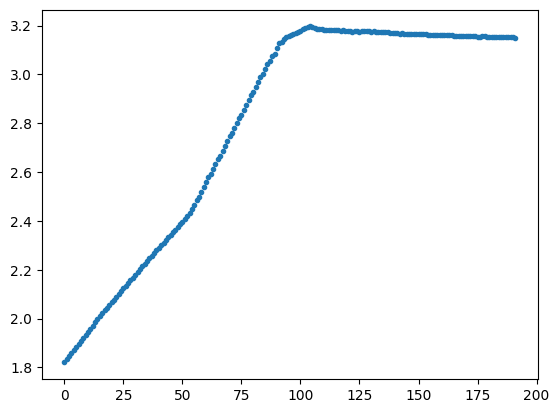

In [29]:
x = []
for i in range(len(list1)):
      x.append(i)
plt.plot(x,list1,'.')

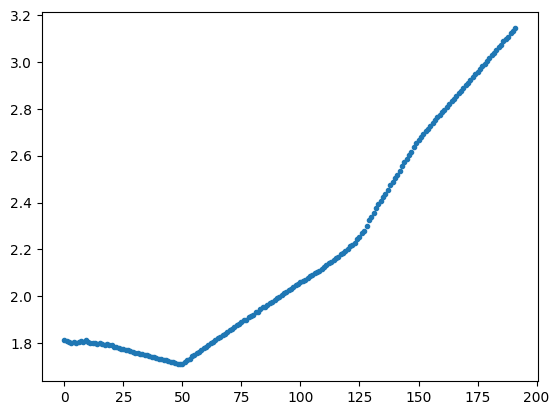

In [30]:
plt.plot(x,list2,'.')

# 河流

In [31]:
# RIV
k_rivbott = 1 # 河床底部渗透系数，m/d
thick_rivbott = 1 # 河床沉积物厚度，m
cond = k_rivbott * (delr) * (delc) / (thick_rivbott) # conductance, m2/d
r_bott = -2 # 河底高程, 也可以设为 0
riv_stage = 2 # 河流水位，[1, 5, 2]
riv_sp_0 = [] # 应力周期 0
# riv_sp_1 = [] # 应力周期 1
# riv_sp_2 = [] # 应力周期 2
for i in range(ncol): # 河流水位, conductance, 河底高程
    if idomain[0,100,i] == 1:
        riv_sp_0.append([0, 100, i, riv_stage, cond, r_bott])
        # riv_sp_1.append([0, 14, i, riv_stage[1], cond, r_bott])
        # riv_sp_2.append([0, 14, i, riv_stage[2], cond, r_bott])`
riv_spd = {0: riv_sp_0}
print("河底高程:",r_bott)
print("河流水位:",riv_stage)
print("河床底部渗透系数:",k_rivbott,"m/d")
print("河床沉积物厚度:",thick_rivbott,"m")
print("conductance:",cond,"m2/d")

河底高程: -2
河流水位: 2
河床底部渗透系数: 1 m/d
河床沉积物厚度: 1 m
conductance: 2483.3342015286 m2/d


In [32]:
    # riverline = [[(Lx - 1.0, Ly), (Lx - 1.0, 0.0)]]
    # rivcells = g.intersect(riverline, "line", 0)

# 建模

In [33]:
import flopy
def build_model():
    sim = flopy.mf6.MFSimulation(
        sim_name=sim_name, sim_ws=sim_ws, exe_name='/usr/local/lib/modflow/mf6'
    )
    print("sim_name:",sim_name)
    print("sim_ws:",sim_ws)

    # 时间离散化
    flopy.mf6.ModflowTdis(
        sim, nper=nper, perioddata=tdis_ds, time_units=time_units
    )

    # GWF
    gwf = flopy.mf6.ModflowGwf(
        sim,
        modelname=gwfname,
        save_flows=True,
        model_nam_file="{}.nam".format(gwfname),
    )
    print("gwfname:",gwfname)

    # 渗流模型求解参数
    imsgwf = flopy.mf6.ModflowIms(
        sim,
        print_option="SUMMARY",
        outer_dvclose=hclose,
        outer_maximum=nouter,
        under_relaxation="NONE",
        inner_maximum=ninner,
        inner_dvclose=hclose,
        rcloserecord=rclose,
        linear_acceleration="CG",
        scaling_method="NONE",
        reordering_method="NONE",
        relaxation_factor=relax,
        filename="{}.ims".format(gwfname),
    )
    sim.register_ims_package(imsgwf, [gwf.name])

    # 离散化
    dis6 = flopy.mf6.ModflowGwfdis(
        gwf,
        length_units=length_units,
        xorigin=xorigin,
        yorigin=yorigin,
        nlay=nlay,
        nrow=nrow,
        ncol=ncol,
        delr=delr,
        delc=delc,
        top=top,
        botm=botm,
        idomain=idomain,
        filename="{}.dis".format(gwfname),
    )
    print("nlay:",nlay)
    print("nrow:",nrow)
    print("ncol:",ncol)
    print("delr:",delr)
    print("delc:",delc)
    print("top:",top)
    print("botm:",botm)

    # 含水层特性
    flopy.mf6.ModflowGwfnpf(
        gwf,
        save_flows=False,
        icelltype=icelltype,
        k=k11,
        # k22=1.0,
        # k22overk=k22overk,
        # k33overk=k33overk,
        k33=k33,
        save_specific_discharge=True,
        filename="{}.npf".format(gwfname),
    )
    print("icelltype:",icelltype)
    print("k11:",k11)
    print("k33:",k33)
    

    # 初始水头
    flopy.mf6.ModflowGwfic(
        gwf, strt=strt, filename="{}.ic".format(gwfname)
    )
    print("strt:",strt[0,100,100])
    print("strt:",strt[1,100,100])
    print("strt:",strt[2,100,100])
    print("strt:",strt[3,100,100])

    # 指定水头边界
    flopy.mf6.ModflowGwfchd(
        gwf,
        maxbound=len(chd_spd),
        stress_period_data=chd_spd,
        save_flows=False,
        auxiliary="CONCENTRATION",
        pname="CHD-1",
        filename="{}.chd".format(gwfname),
    )
    print("chd_spd:",chd_spd[0][:10])
 
    flopy.mf6.ModflowGwfriv(
        gwf, 
        stress_period_data=riv_spd
    )

    # 井边界
    flopy.mf6.ModflowGwfwel(
        gwf,
        print_input=True,
        print_flows=True,
        stress_period_data=wel_spd,
        save_flows=False,
        auxiliary="CONCENTRATION",
        pname="WEL-1",
        filename="{}.wel".format(gwfname),
    )
    print("wel_spd:",wel_spd)

    # 补给recharge
    flopy.mf6.ModflowGwfrcha(
        gwf,
        recharge=rch,
        filename="{}.rch".format(gwfname),
    )
    print("rch:",rch[100,100])

    # 蒸发
    flopy.mf6.ModflowGwfevta(
        gwf,
        surface=et_surf,
        rate=et_rat,
        depth=et_dep,
        filename="{}.evt".format(gwfname),
    )
    print("et_surf:",et_surf[100,100])
    print("et_rat:",et_rat[100,100])
    print("et_dep:",et_dep[100,100])

    # 输出控制
    flopy.mf6.ModflowGwfoc(
        gwf,
        head_filerecord="{}.hds".format(gwfname),
        budget_filerecord="{}.bud".format(gwfname),
        headprintrecord=[
            ("COLUMNS", 100, "WIDTH", 150, "DIGITS", 6, "GENERAL")
        ],
        saverecord=[("HEAD", "ALL"), ("BUDGET", "ALL")],
        printrecord=[("HEAD", "ALL"), ("BUDGET", "ALL")],
    )

    # GWT
    gwt = flopy.mf6.ModflowGwt(
        sim,
        modelname=gwtname,
        save_flows=True,
        model_nam_file="{}.nam".format(gwtname),
    )

    # 溶质运移模型求解参数
    imsgwt = flopy.mf6.ModflowIms(
        sim,
        print_option="SUMMARY",
        outer_dvclose=hclose,
        outer_maximum=nouter,
        under_relaxation="NONE",
        inner_maximum=ninner,
        inner_dvclose=hclose,
        rcloserecord=rclose,
        linear_acceleration="BICGSTAB",
        scaling_method="NONE",
        reordering_method="NONE",
        relaxation_factor=relax,
        filename="{}.ims".format(gwtname),
    )
    sim.register_ims_package(imsgwt, [gwt.name])

    # 离散化
    flopy.mf6.ModflowGwtdis(
        gwt,
        nlay=nlay,
        nrow=nrow,
        ncol=ncol,
        delr=delr,
        delc=delc,
        top=top,
        botm=botm,
        idomain=idomain,
        filename="{}.dis".format(gwtname),
    )

    # 初始浓度
    flopy.mf6.ModflowGwtic(
        gwt, strt=sconc, filename="{}.ic".format(gwtname)
    )

    # 对流
    flopy.mf6.ModflowGwtadv(
        gwt, scheme="UPSTREAM", filename="{}.adv".format(gwtname)
    )

    # 弥散
    flopy.mf6.ModflowGwtdsp(
        gwt,
        alh=al,
        ath1=ath1,
        atv=atv,
        filename="{}.dsp".format(gwtname),
    )

    # 化学反应 (等同于 MT3DMS 的 reaction)
    flopy.mf6.ModflowGwtmst(
        gwt,
        porosity=porosity,
        first_order_decay=False,
        decay=None,
        decay_sorbed=None,
        sorption=None,
        bulk_density=None,
        distcoef=None,
        filename="{}.mst".format(gwtname),
    )

    # 源汇项
    sourcerecarray = [
        ("WEL-1", "AUX", "CONCENTRATION"),
        ("CHD-1", "AUX", "CONCENTRATION"),
    ]
    flopy.mf6.ModflowGwtssm(
        gwt, sources=sourcerecarray, filename="{}.ssm".format(gwtname)
    )

    # 输出控制
    flopy.mf6.ModflowGwtoc(
        gwt,
        budget_filerecord="{}.cbc".format(gwtname),
        concentration_filerecord="{}.ucn".format(gwtname),
        concentrationprintrecord=[
            ("COLUMNS", 10, "WIDTH", 15, "DIGITS", 6, "GENERAL")
        ],
        saverecord=[("CONCENTRATION", "ALL"), ("BUDGET", "ALL")],
        printrecord=[("CONCENTRATION", "ALL"), ("BUDGET", "ALL")],
    )

    # GWF 和 GWT 之间的交换
    flopy.mf6.ModflowGwfgwt(
        sim,
        exgtype="GWF6-GWT6",
        exgmnamea=gwfname,
        exgmnameb=gwtname,
        filename="{}.gwfgwt".format(sim_name),
    )
    return sim, gwf, gwt, dis6

# import matplotlib.pyplot as plt

In [34]:
import matplotlib.pyplot as plt
def plot_results(model, result):
    fig = plt.figure(figsize = (14, 6))
    ax = fig.add_subplot(1, 1, 1)
    pmv = flopy.plot.PlotMapView(model = model, ax = ax, layer = 0)
    pmv.plot_grid(ax = ax, color = ".5", alpha = 0.2) # 绘制网格
    
    # 网格填充颜色
    plot_array = pmv.plot_array(result, masked_values = [1e30], cmap = 'bwr')
    plt.colorbar(plot_array)
    riv = pmv.plot_bc("RIV", alpha = 0.5)
    qm = pmv.plot_bc("CHD", alpha = 0.5)
    
    # 绘制等值线
    plot_contour_array = pmv.contour_array(result, masked_values = [1e30], cmap = "brg", linestyles="--")
    plt.clabel(plot_contour_array, fmt = r'%.2f') # 绘制等值线上文本标注
    # plt.colorbar(plot_contour_array)              # 等值线图例
    
    pmv.plot_bc(package = model.get_package("WEL-1"), color = 'green')
    pmv.plot_inactive(ibound = model.modelgrid.idomain, color_noflow = 'black')
    
    # 绘制水流的方向 (粉红色箭头)
    spdis = gwf.oc.output.budget().get_data(text = 'DATA-SPDIS')[0]
    qx, qy, qz = flopy.utils.postprocessing.get_specific_discharge(spdis, gwf)
    pmv.plot_vector(qx, qy, normalize = True, istep = 10, jstep = 10, color = "pink")

In [35]:
import os

In [36]:
import pandas

# 假如模型中增加一个污染源

In [37]:
# 输入一个污染源，想知道它接下来的发展
# 用户点击鼠标，生成一个【经纬度】
userInput = [121.049864464, 32.551416489]

In [38]:
x2000tmp, y2000tmp = WGS84_CGCS2000(userInput[0],userInput[1], 3, is_zone_number=True)


/home/nandahgy/.local/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/nandahgy/.local/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_150/4273154816.py:24: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x_prj, y_prj = transform

In [39]:
pollutionX = x2000tmp - X_DIFF
pollutionY = y2000tmp - Y_DIFF

print("对应的网格坐标:", pollutionX, pollutionY)

对应的网格坐标: 504590 3603118


In [40]:
sim, gwf, gwt, dis6 = build_model()

sim_name: model
sim_ws: simulation_1027_A
gwfname: gwf_model
nlay: 4
nrow: 213
ncol: 283
delr: 49.84594
delc: 49.82019
top: [[4.69283342 4.69255257 4.69226456 ... 5.01899052 5.01942301 5.01983881]
 [4.69307709 4.69280005 4.69251633 ... 5.02000856 5.0204258  5.02082682]
 [4.69332266 4.69304991 4.69277    ... 5.02101517 5.02141762 5.02180433]
 ...
 [4.72964048 4.72994184 4.7302537  ... 4.95594215 4.95694733 4.95793676]
 [4.73020363 4.73051167 4.73083019 ... 4.95507908 4.95608139 4.95706892]
 [4.7307682  4.73108292 4.73140764 ... 4.95423317 4.9552331  4.95621824]]
botm: [[[ -2.          -2.          -2.         ...  -2.          -2.
    -2.        ]
  [ -2.          -2.          -2.         ...  -2.          -2.
    -2.        ]
  [ -2.          -2.          -2.         ...  -2.          -2.
    -2.        ]
  ...
  [ -2.          -2.          -2.         ...  -2.          -2.
    -2.        ]
  [ -2.          -2.          -2.         ...  -2.          -2.
    -2.        ]
  [ -2.        

In [41]:
xvertice = gwf.modelgrid.xvertices
yvertice = gwf.modelgrid.yvertices
x0 = xvertice[0,0]
y0 = yvertice[0,0]
print("x0:", x0)
print("y0:", y0)

x0: 498149.0
y0: 3604861.70047


In [42]:
pollutionX - x0

6441.0

In [43]:
y0 - pollutionY

1743.7004700000398

In [44]:
pollutionC = int((pollutionX - x0) // delc)
pollutionR = int((y0 - pollutionY) // delr)

print("对应的网格序号:", pollutionC, pollutionR)

对应的网格序号: 129 34


In [45]:
x_test = xvertice[pollutionR,pollutionC]
y_test = yvertice[pollutionR,pollutionC]
print("x0:", x_test)
print("y0:", y_test)

x0: 504579.12626
y0: 3603167.81401


In [187]:
# 边界条件: # Boundary conditions
# wel_spd 井
wel_spd = []
qwell = 0.5
cwell = 100.0
laytmp = 2
directions = [[-1,-1],[-1,0],[-1,1], \
              [0,-1],[0,0],[0,1], \
              [1,-1],[1,0],[1,1]]
for dx, dy in directions:
      wel_loc = (laytmp, pollutionR + dx, pollutionC + dy)
      wel_spd.append([wel_loc, qwell, cwell])
wel_spd = {0: wel_spd}
wel_spd

{0: [[(2, 33, 128), 0.5, 100.0],
  [(2, 33, 129), 0.5, 100.0],
  [(2, 33, 130), 0.5, 100.0],
  [(2, 34, 128), 0.5, 100.0],
  [(2, 34, 129), 0.5, 100.0],
  [(2, 34, 130), 0.5, 100.0],
  [(2, 35, 128), 0.5, 100.0],
  [(2, 35, 129), 0.5, 100.0],
  [(2, 35, 130), 0.5, 100.0]]}

In [47]:
# 时间离散化参数:
# Temporal discretization
# 时间离散化参数:
nper = 3
tdis_ds = [(100.0, 10, 1.0), (900.0, 10, 1.0), (9000.0, 10, 1.0)]
print(tdis_ds)

# Filename
sim_ws = 'simulation_1026_pollution'
sim_name = 'pollution'          # 模拟总名称
gwfname = "gwf_" + sim_name # 渗流模型名称
gwtname = "gwt_" + sim_name # 溶质运移模型名称


sim, gwf, gwt, dis6 = build_model()
sim.write_simulation(silent = True)

success, buff = sim.run_simulation(silent = True)
if not success:
    raise Exception("MODFLOW 6 did not terminate normally.")


[(100.0, 10, 1.0), (900.0, 10, 1.0), (9000.0, 10, 1.0)]
sim_name: pollution
sim_ws: simulation_1026_pollution
gwfname: gwf_pollution
nlay: 4
nrow: 213
ncol: 283
delr: 49.84594
delc: 49.82019
top: [[4.69283342 4.69255257 4.69226456 ... 5.01899052 5.01942301 5.01983881]
 [4.69307709 4.69280005 4.69251633 ... 5.02000856 5.0204258  5.02082682]
 [4.69332266 4.69304991 4.69277    ... 5.02101517 5.02141762 5.02180433]
 ...
 [4.72964048 4.72994184 4.7302537  ... 4.95594215 4.95694733 4.95793676]
 [4.73020363 4.73051167 4.73083019 ... 4.95507908 4.95608139 4.95706892]
 [4.7307682  4.73108292 4.73140764 ... 4.95423317 4.9552331  4.95621824]]
botm: [[[ -2.          -2.          -2.         ...  -2.          -2.
    -2.        ]
  [ -2.          -2.          -2.         ...  -2.          -2.
    -2.        ]
  [ -2.          -2.          -2.         ...  -2.          -2.
    -2.        ]
  ...
  [ -2.          -2.          -2.         ...  -2.          -2.
    -2.        ]
  [ -2.          -2.    

In [48]:
import matplotlib.pyplot as plt

head = gwf.oc.output.head().get_alldata()
concentration = gwt.oc.output.concentration().get_alldata()
print("head.shape:", head.shape)
print("concentration.shape:", concentration.shape)


head.shape: (30, 4, 213, 283)
concentration.shape: (30, 4, 213, 283)


/usr/local/lib/python3.9/dist-packages/flopy/plot/map.py:243: UserWarning: No contour levels were found within the data range.
  contour_set = ax.tricontour(triang, plotarray, **kwargs)


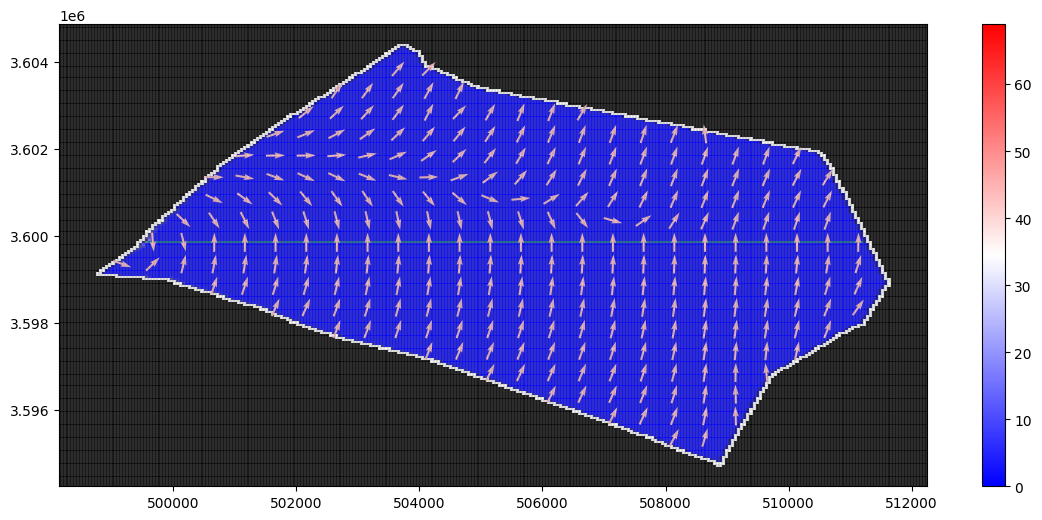

In [49]:
plot_results(model = gwf, result = concentration[9,0])

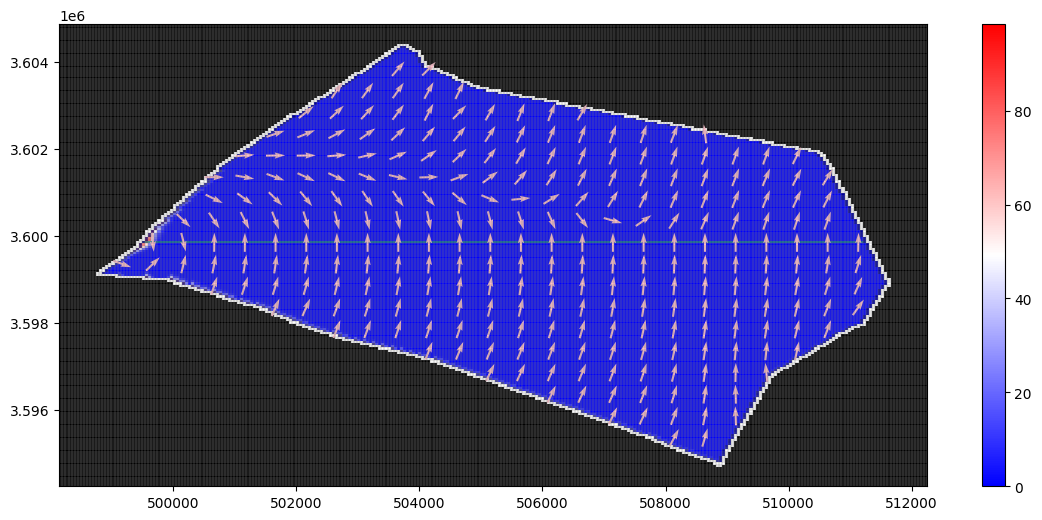

In [50]:
plot_results(model = gwf, result = concentration[19,0])

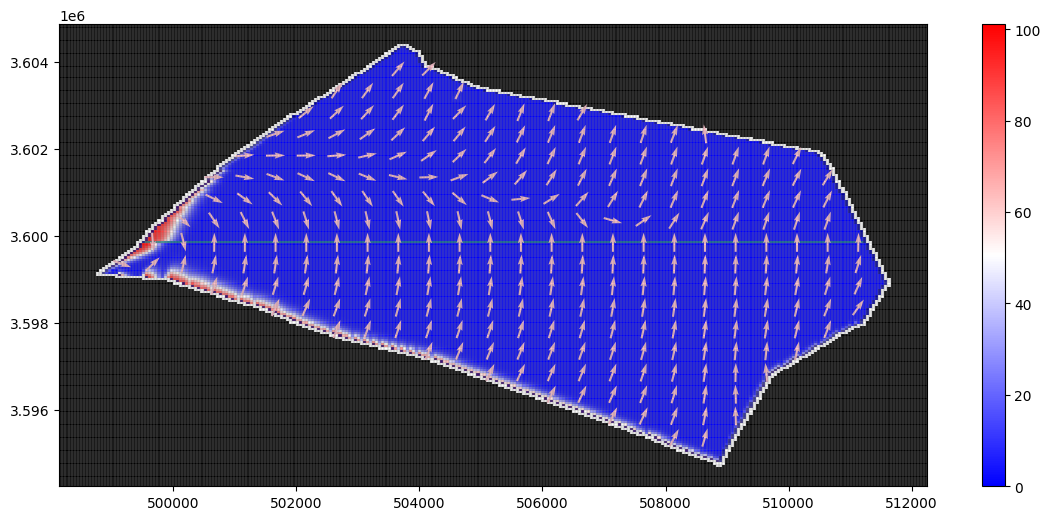

In [51]:
plot_results(model = gwf, result = concentration[29,0])

# 假如模型需要“溯源”

## 这些点是能够溯源到的

In [52]:
# create particles
grid = gwf.modelgrid
partlocs = []
partids = []
for i in range(0,grid.nrow,10):
      for j in range(0,grid.ncol,10):
            if idomain[0,i,j] == 1:
                partlocs.append((0, i, j))
                partids.append(i*grid.ncol + j)
part0 = flopy.modpath.ParticleData(partlocs, structured=True, particleids=partids)
pg0 = flopy.modpath.ParticleGroup(
    particlegroupname="PG1", particledata=part0, filename="ex01a.sloc"
)

v = [(0,), (400,)]
pids = [1, 2]  # [1000, 1001]
part1 = flopy.modpath.ParticleData(v, structured=False, drape=1, particleids=pids)
pg1 = flopy.modpath.ParticleGroup(
    particlegroupname="PG2", particledata=part1, filename="ex01a.pg2.sloc"
)

particlegroups = [pg0, pg1]

只有当simulationtype为'timeseries'或'combined'时才使用的包含2项的列表或元组。

如果第二项是浮点数，则时间点数据对应于时间点选项1，

第一个条目是`时间点的数量(timepointcount)`，

第二个条目是`时间点间隔`。

如果第二项是列表、元组或np。

Ndarray则时间点数据对应于时间点选项2和

第二个项目中的时间点条目的数量(timepointcount)，第二个项目是用户定义的时间点的列表、元组或数组。

ndarray then the timepoint data corresponds to time point option 2 and the number of time points entries(timepointcount) in the second item and the second item is an list, tuple, or array of user-defined time points.

如果Timepointdata为None，则指定时间点选项1，并将总模拟时间分割为100个间隔(默认为None)。


`Stoptimeoption: str。`

如果停止时间选项为“`total`”，如果模拟“向前”跟踪，则粒子将在最后时间步的末尾停止;

如果模拟“`向后`”跟踪，则粒子将在第一个时间步的开头停止。

如果停止时间选项为“`延长`”，初始或最终稳态时间步长将被`延长`，所有粒子将被跟踪，直到它们到达终止位置。

如果“指定”停止时间选项，粒子将被跟踪，直到它们到达终止位置或到达指定的停止时间(默认是“`extend`”)。


zero-based stress period (int)

time  step (int)

relative time position (float)


In [53]:
wel_loc = (laytmp, pollutionR, pollutionC)
zone3 = np.ones((nrow, ncol), dtype=np.int32)
for i in range(50,grid.nrow//2):
      for j in range(grid.ncol//2):
            if idomain[0,i,j] == 1:
                  zone3[i,j] = 2
zone3[100][100]

2

In [54]:
mp_namea = sim_name + "a_mp"
model_ws = sim_ws
# create modpath files
mp = flopy.modpath.Modpath7(
    modelname=mp_namea, flowmodel=gwf, exe_name="/usr/local/lib/modflow/mp7", model_ws=model_ws
)
flopy.modpath.Modpath7Bas(mp, porosity=porosity)

flopy.modpath.Modpath7Sim(
    mp,
    simulationtype="combined",
    trackingdirection="backward", # 重要
    weaksinkoption="pass_through",
    weaksourceoption="pass_through",
    referencetime=0.0,
    stoptimeoption="specified", # "extend"
    stoptime=365.0*20,
    zonedataoption="on",
    stopzone=2,
    zones=zone3,
    timepointdata=[100, 365.0], # the number of time points (timepointcount)
    particlegroups=particlegroups, # 粒子群参数
)

# flopy.modpath.Modpath7Sim(
#     mp,
#     simulationtype="combined",
#     trackingdirection="backward", # 重要
#     weaksinkoption="pass_through",
#     weaksourceoption="pass_through",
#     referencetime=0.0,
#     stoptimeoption="specified", # "extend"
#     stoptime=500000.0,
#     zonedataoption="on",
#     stopzone=2,
#     zones=zone3,
#     timepointdata=[500, 1000.0], # the number of time points (timepointcount)
#     particlegroups=particlegroups, # 粒子群参数
# )

# flopy.modpath.Modpath7Sim(
#     mp,
#     simulationtype="combined",
#     trackingdirection="backward", # 重要
#     weaksinkoption="pass_through",
#     weaksourceoption="pass_through",
#     referencetime=0.0,
#     stoptimeoption="extend", # "extend"
#     zonedataoption="on",
#     stopzone=2,
#     zones=zone3,
#     timepointdata=[500, 1000.0],
#     particlegroups=particlegroups, # 粒子群参数
# )

# flopy.modpath.Modpath7Sim(
#     mp,
#     simulationtype="combined",
#     trackingdirection="forward",
#     weaksinkoption="pass_through",
#     weaksourceoption="pass_through",
#     budgetoutputoption="summary",
#     budgetcellnumbers=[1049, 1259],
#     traceparticledata=[1, 1000],
#     referencetime=[0, 0, 0.0],
#     stoptimeoption="extend",
#     timepointdata=[500, 1000.0],
#     zonedataoption="on",
#     stopzone=2,
#     zones=zone3,
#     particlegroups=particlegroups,
# )

# write modpath datasets
mp.write_input()


FloPy is using the following executable to run the model: /usr/local/lib/modflow/mp7

MODPATH Version 7.2.001   
Program compiled Mar 08 2022 20:16:00 with IFORT compiler (ver. 20.21.5)        
 
 
Run particle tracking simulation ...
Processing Time Step     1 Period     1.  Time =  1.00000E+01  Steady-state flow                                                    

Particle Summary:
         0 particles are pending release.
       197 particles remain active.
         0 particles terminated at boundary faces.
         0 particles terminated at weak sink cells.
         0 particles terminated at weak source cells.
         3 particles terminated at strong source/sink cells.
        60 particles terminated in cells with a specified zone number.
         2 particles were stranded in inactive or dry cells.
         0 particles were unreleased.
         0 particles have an unknown status.
 
Normal termination.                                                        


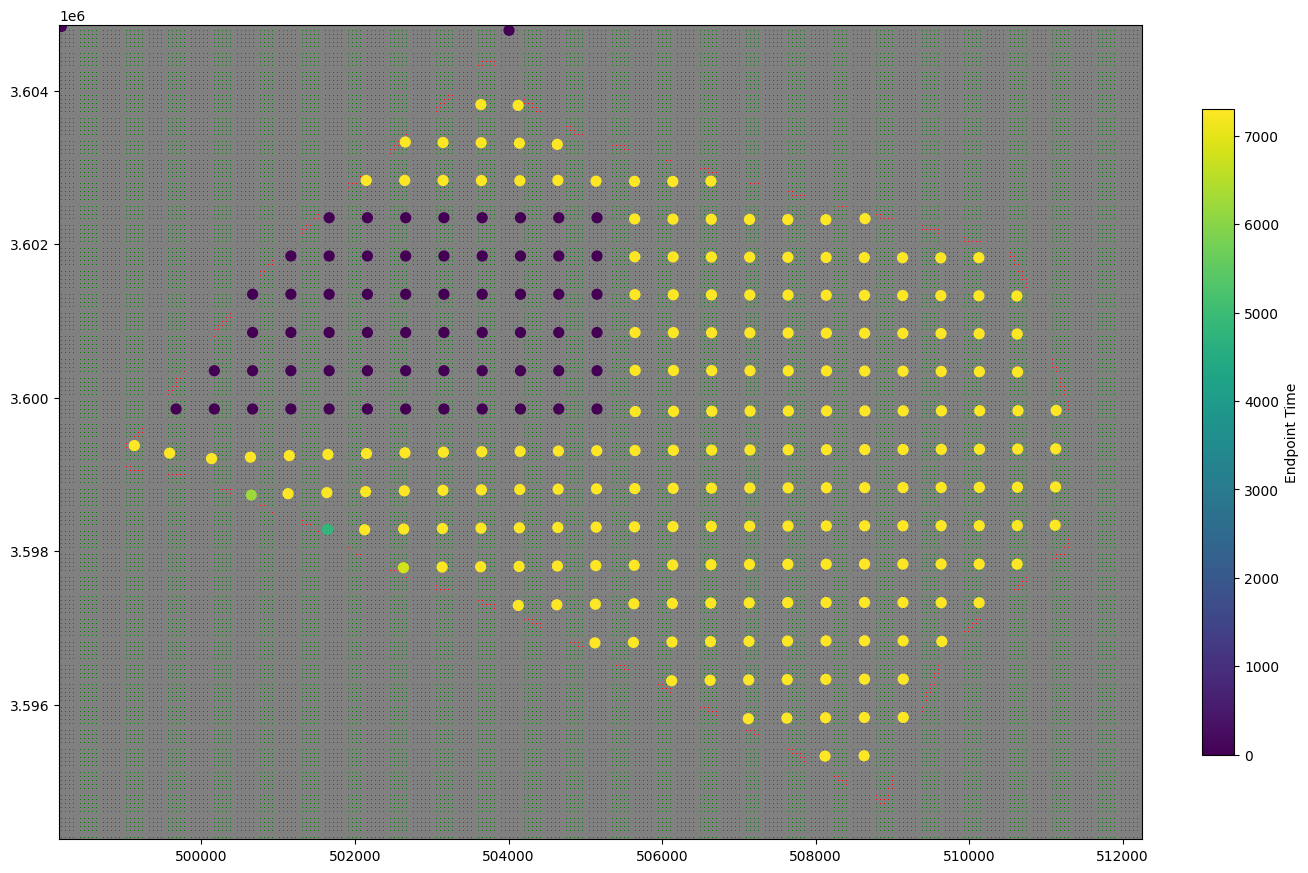

In [55]:
# run modpath
mp.run_model()

fpth = os.path.join(model_ws, mp_namea + ".mppth")
p = flopy.utils.PathlineFile(fpth)
p0 = p.get_alldata()
fpth = os.path.join(model_ws, mp_namea + ".timeseries")
ts = flopy.utils.TimeseriesFile(fpth)
ts0 = ts.get_alldata()

# 画出endpoint
fpth = os.path.join(model_ws, mp_namea + ".mpend")
e = flopy.utils.EndpointFile(fpth)
e0 = e.get_alldata()

import matplotlib as mpl
fig = plt.figure(figsize=(13, 13), constrained_layout=True)
ax = fig.add_subplot(1, 1, 1, aspect="equal")
mm = flopy.plot.PlotMapView(modelgrid=gwf.modelgrid, ax=ax)
ax.set_xlim(0, Lx)
ax.set_ylim(0, Ly)
cmap = mpl.colors.ListedColormap(
    [
        "r",
        "g",
    ]
)
pmv = flopy.plot.PlotMapView(model = gwf, ax = ax, layer = 0)
# plot_array = pmv.plot_array(head[9,0], masked_values = [1e30], cmap = 'bwr')
# plt.colorbar(plot_array)
v = mm.plot_array(idomain[0], cmap=cmap, edgecolor="gray")
mm.plot_endpoint(e0, direction="ending", colorbar=True, shrink=0.5);

/usr/local/lib/python3.9/dist-packages/flopy/plot/map.py:243: UserWarning: No contour levels were found within the data range.
  contour_set = ax.tricontour(triang, plotarray, **kwargs)


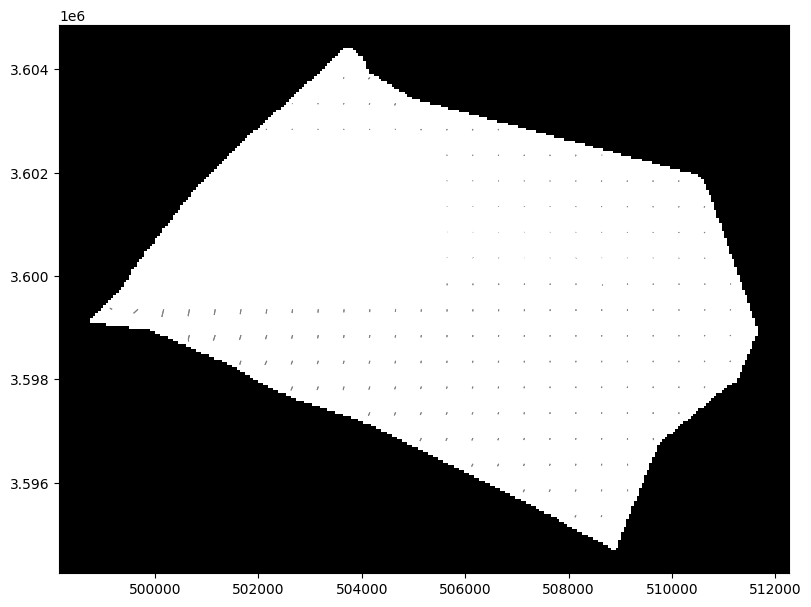

In [56]:
import matplotlib as mpl
fig = plt.figure(figsize=(8, 8), constrained_layout=True)
ax = fig.add_subplot(1, 1, 1, aspect="equal")
mm = flopy.plot.PlotMapView(modelgrid=gwf.modelgrid, ax=ax)
# pmv = flopy.plot.PlotMapView(model = gwf, ax = ax, layer = 0)
# mm.plot_grid(ax = ax, color = ".5", alpha = 0.2) # 绘制网格
ax.set_xlim(0, Lx)
ax.set_ylim(0, Ly)
cmap = mpl.colors.ListedColormap(
    [
        "r",
        "g",
    ]
)
v = mm.plot_array(gwf.modelgrid.idomain, cmap=cmap, edgecolor="white")
mm.plot_pathline(p0, layer="all", color="blue", lw=0.75)
colors = ["green", "orange", "red","blue"]
# 绘制各个颜色的点
# for k in range(nlay):
#     mm.plot_timeseries(ts0, layer=k, marker="o", lw=0, color=colors[k]);

# 绘制等值线
plot_contour_array = mm.contour_array(concentration[9,0], masked_values = [1e30], cmap = "brg", linestyles="--")
plt.clabel(plot_contour_array, fmt = r'%.2f') # 绘制等值线上文本标注
# plt.colorbar(plot_contour_array)              # 等值线图例

mm.plot_bc(package = gwf.get_package("WEL-1"), color = 'green')
mm.plot_inactive(ibound = gwf.modelgrid.idomain, color_noflow = 'black')



## 在一个监测点附近进行溯源

In [57]:
userInput = [121.049864464, 32.551416489]
x2000tmp, y2000tmp = WGS84_CGCS2000(userInput[0],userInput[1], 3, is_zone_number=True)
monitorX = x2000tmp - X_DIFF
monitorY = y2000tmp - Y_DIFF
x0 = xvertice[0,0]
y0 = yvertice[0,0]
monitorC = int((monitorX - x0) // delc)
monitorR = int((y0 - monitorY) // delr)
laytmp = 1
nodew = (laytmp, monitorR, monitorC)

/home/nandahgy/.local/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/nandahgy/.local/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_150/4273154816.py:24: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x_prj, y_prj = transform

In [58]:
# Define names for the MODPATH 7 simulations
mp_namea = sim_name + "a_mp3"
mp_nameb = sim_name + "b_mp3"

multi = 1 # 

pcoord = np.array(
    [
        [0.000 * multi, 0.125 * multi, 0.500],
        [0.000 * multi, 0.375 * multi, 0.500],
        [0.000 * multi, 0.625 * multi, 0.500],
        [0.000 * multi, 0.875 * multi, 0.500],
        [1.000 * multi, 0.125 * multi, 0.500],
        [1.000 * multi, 0.375 * multi, 0.500],
        [1.000 * multi, 0.625 * multi, 0.500],
        [1.000 * multi, 0.875 * multi, 0.500],
        [0.125 * multi, 0.000 * multi, 0.500],
        [0.375 * multi, 0.000 * multi, 0.500],
        [0.625 * multi, 0.000 * multi, 0.500],
        [0.875 * multi, 0.000 * multi, 0.500],
        [0.125 * multi, 1.000 * multi, 0.500],
        [0.375 * multi, 1.000 * multi, 0.500],
        [0.625 * multi, 1.000 * multi, 0.500],
        [0.875 * multi, 1.000 * multi, 0.500],
    ]
)
print("pcoord.shape[0]:",pcoord.shape[0])
# pcoord.shape[0]

plocs = [nodew for i in range(pcoord.shape[0])]
print("plocs:", plocs)
# create particle data
pa = flopy.modpath.ParticleData(
    plocs,
    structured=True,
    localx=pcoord[:, 0],
    localy=pcoord[:, 1],
    localz=pcoord[:, 2],
    drape=0,
)
print("pcoord[:, 0]:",pcoord[:, 0])
print("pcoord[:, 1]:",pcoord[:, 1])
print("pcoord[:, 2]:",pcoord[:, 2])

# create backward particle group
fpth = mp_namea + ".sloc"
pga = flopy.modpath.ParticleGroup(
    particlegroupname="BACKWARD1", particledata=pa, filename=fpth
)

model_ws = sim_ws
# create modpath files
mp = flopy.modpath.Modpath7(
    modelname=mp_namea, flowmodel=gwf, exe_name="/usr/local/lib/modflow/mp7", model_ws=model_ws
)
flopy.modpath.Modpath7Bas(mp, porosity=porosity)
flopy.modpath.Modpath7Sim(
    mp,
    simulationtype="combined",
    trackingdirection="backward",
    weaksinkoption="pass_through",
    weaksourceoption="pass_through",
    referencetime=0.0,
    stoptimeoption="extend",
    timepointdata=[500, 1000.0],
    particlegroups=pga,
)

# write modpath datasets
mp.write_input()

pcoord.shape[0]: 16
plocs: [(1, 34, 129), (1, 34, 129), (1, 34, 129), (1, 34, 129), (1, 34, 129), (1, 34, 129), (1, 34, 129), (1, 34, 129), (1, 34, 129), (1, 34, 129), (1, 34, 129), (1, 34, 129), (1, 34, 129), (1, 34, 129), (1, 34, 129), (1, 34, 129)]
pcoord[:, 0]: [0.    0.    0.    0.    1.    1.    1.    1.    0.125 0.375 0.625 0.875
 0.125 0.375 0.625 0.875]
pcoord[:, 1]: [0.125 0.375 0.625 0.875 0.125 0.375 0.625 0.875 0.    0.    0.    0.
 1.    1.    1.    1.   ]
pcoord[:, 2]: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


FloPy is using the following executable to run the model: /usr/local/lib/modflow/mp7

MODPATH Version 7.2.001   
Program compiled Mar 08 2022 20:16:00 with IFORT compiler (ver. 20.21.5)        
 
 
Run particle tracking simulation ...
Processing Time Step     1 Period     1.  Time =  1.00000E+01  Steady-state flow                                                    

Particle Summary:
         0 particles are pending release.
         0 particles remain active.
         0 particles terminated at boundary faces.
         0 particles terminated at weak sink cells.
         0 particles terminated at weak source cells.
        16 particles terminated at strong source/sink cells.
         0 particles terminated in cells with a specified zone number.
         0 particles were stranded in inactive or dry cells.
         0 particles were unreleased.
         0 particles have an unknown status.
 
Normal termination.                                                        


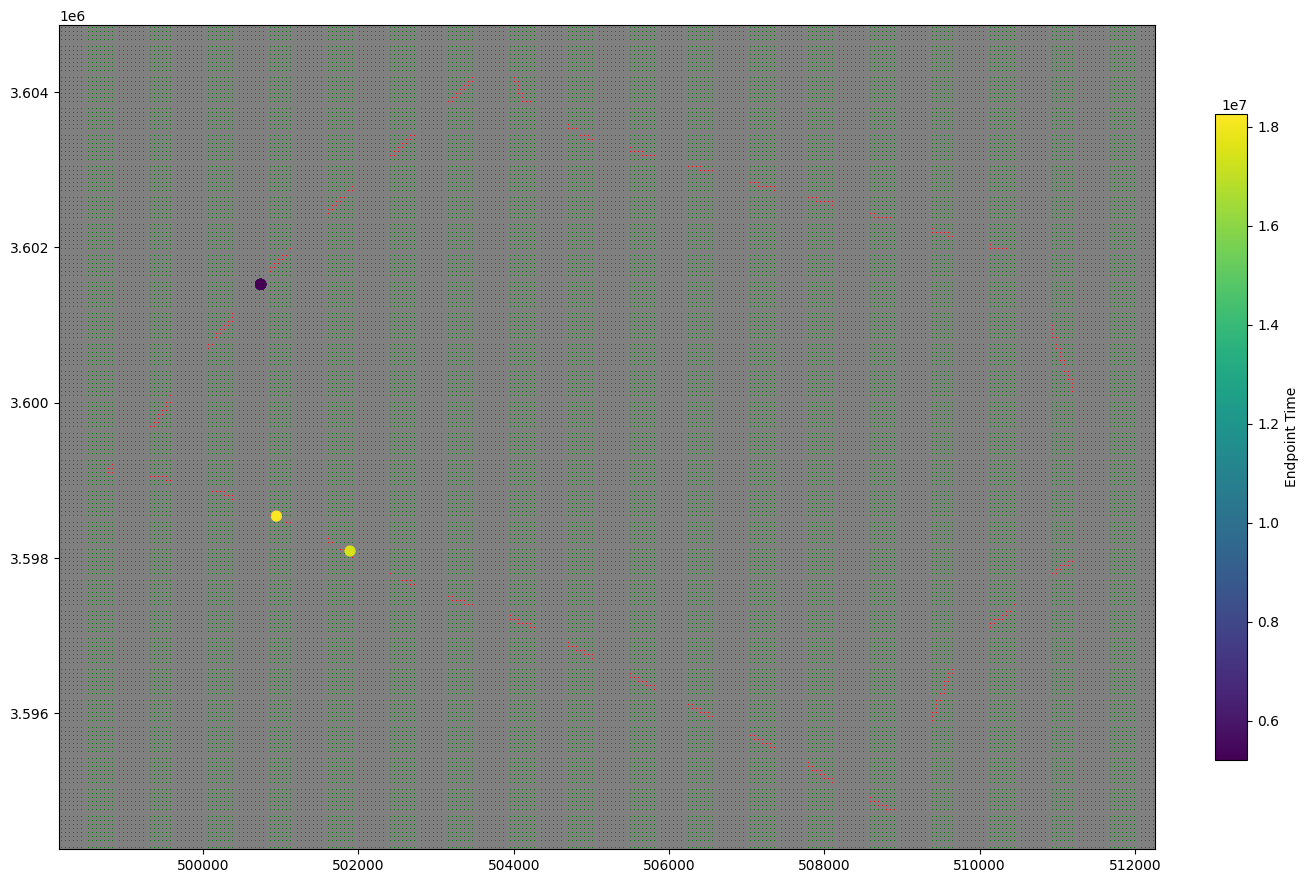

In [59]:
# run modpath
mp.run_model()

fpth = os.path.join(model_ws, mp_namea + ".mppth")
p = flopy.utils.PathlineFile(fpth)
p0 = p.get_alldata()
fpth = os.path.join(model_ws, mp_namea + ".timeseries")
ts = flopy.utils.TimeseriesFile(fpth)
ts0 = ts.get_alldata()

# 画出endpoint
fpth = os.path.join(model_ws, mp_namea + ".mpend")
e = flopy.utils.EndpointFile(fpth)
e0 = e.get_alldata()

import matplotlib as mpl
fig = plt.figure(figsize=(13, 13), constrained_layout=True)
ax = fig.add_subplot(1, 1, 1, aspect="equal")
mm = flopy.plot.PlotMapView(modelgrid=gwf.modelgrid, ax=ax)
ax.set_xlim(0, Lx)
ax.set_ylim(0, Ly)
cmap = mpl.colors.ListedColormap(
    [
        "r",
        "g",
    ]
)
pmv = flopy.plot.PlotMapView(model = gwf, ax = ax, layer = 0)
plot_array = pmv.plot_array(head[9,0], masked_values = [1e30], cmap = 'bwr')
# plt.colorbar(plot_array)
v = mm.plot_array(idomain[0], cmap=cmap, edgecolor="gray")
mm.plot_endpoint(e0, direction="ending", colorbar=True, shrink=0.5);

/usr/local/lib/python3.9/dist-packages/flopy/plot/map.py:243: UserWarning: No contour levels were found within the data range.
  contour_set = ax.tricontour(triang, plotarray, **kwargs)


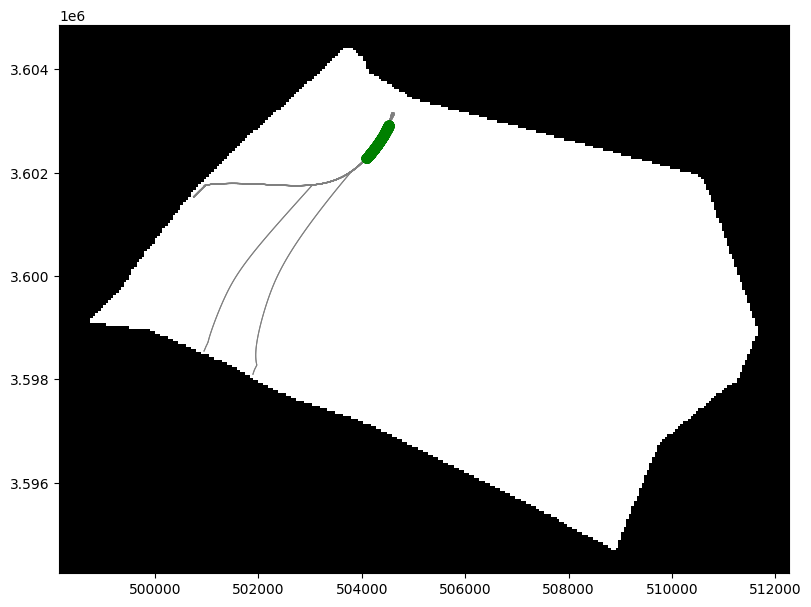

In [60]:
import matplotlib as mpl
fig = plt.figure(figsize=(8, 8), constrained_layout=True)
ax = fig.add_subplot(1, 1, 1, aspect="equal")
mm = flopy.plot.PlotMapView(modelgrid=gwf.modelgrid, ax=ax)
# pmv = flopy.plot.PlotMapView(model = gwf, ax = ax, layer = 0)
# mm.plot_grid(ax = ax, color = ".5", alpha = 0.2) # 绘制网格
ax.set_xlim(0, Lx)
ax.set_ylim(0, Ly)
cmap = mpl.colors.ListedColormap(
    [
        "r",
        "g",
    ]
)
v = mm.plot_array(gwf.modelgrid.idomain, cmap=cmap, edgecolor="white")
mm.plot_pathline(p0, layer="all", color="blue", lw=0.75)
colors = ["green", "orange", "red","blue"]
# 绘制各个颜色的点
# for k in range(nlay):
#     mm.plot_timeseries(ts0, layer=k, marker="o", lw=0, color=colors[k]);
mm.plot_timeseries(ts0, layer=0, marker="o", lw=0, color=colors[0])

# 绘制等值线
plot_contour_array = mm.contour_array(concentration[9,0], masked_values = [1e30], cmap = "brg", linestyles="--")
plt.clabel(plot_contour_array, fmt = r'%.2f') # 绘制等值线上文本标注
# plt.colorbar(plot_contour_array)              # 等值线图例

mm.plot_bc(package = gwf.get_package("WEL-1"), color = 'green')
mm.plot_inactive(ibound = gwf.modelgrid.idomain, color_noflow = 'black')



# 输入监测点的经纬度：

1. 西（关注: 纬度2）
      - (121.03903, 32.55645)
      - (121.02873, 32.55109)
      - (121.01637, 32.54241)
      - (121.00521, 32.53069)
      - (120.99697, 32.52114)

2. 南（关注: 经度1）
      - (121.0016, 32.51694)
      - (121.0186, 32.51071)
      - (121.04383, 32.50217)
      - (121.06993, 32.49204)
      - (121.07902, 32.48769)

3. 东（关注: 纬度2）
      - (121.09533, 32.48407)
      - (121.10048, 32.49464)
      - (121.11267, 32.50405)
      - (121.12022, 32.51621)
      - (121.11524, 32.52852)

4. 北侧（关注: 经度1）
      - (121.11027, 32.53894)
      - (121.09379, 32.54342)
      - (121.07679, 32.54704)
      - (121.06169, 32.55008)
      - (121.04812, 32.55297)

In [61]:
# # 西（关注: 纬度2）
# w1_head = 1.9384161
# w2_head = 2.1213958
# w3_head = 2.3372133
# w4_head = 2.721563
# w5_head = 3.0844603
# # 构建与“纬度2”的函数

# s1_head = 3.0978143
# s2_head = 3.0713224
# s3_head = 3.0268953
# s4_head = 2.9967742
# s5_head = 3.0177681
# # 构建与“经度1”的函数

# e1_head = 2.9459245
# e2_head = 2.678163
# e3_head = 2.37951
# e4_head = 2.0894706
# e5_head = 1.9089196
# # 构建与“纬度2”的函数

# n1_head = 1.7447563
# n2_head = 1.7513279
# n3_head = 1.7967612
# n4_head = 1.8313708
# n5_head = 1.9159524
# # 构建与“经度1”的函数

# west1_userInput = (121.03903, 32.55645)
# west2_userInput = (121.02873, 32.55109)
# west3_userInput = (121.01637, 32.54241)
# west4_userInput = (121.00521, 32.53069)
# west5_userInput = (120.99697, 32.52114)

# # 南（关注: 经度1）
# south1_userInput = (121.0016, 32.51694)
# south2_userInput = (121.0186, 32.51071)
# south3_userInput = (121.04383, 32.50217)
# south4_userInput = (121.06993, 32.49204)
# south5_userInput = (121.07902, 32.48769)

# # 东（关注: 纬度2）
# east1_userInput = (121.09533, 32.48407)
# east2_userInput = (121.10048, 32.49464)
# east3_userInput = (121.11267, 32.50405)
# east4_userInput = (121.12022, 32.51621)
# east5_userInput = (121.11524, 32.52852)

# # 北侧（关注: 经度1）
# north1_userInput = (121.11027, 32.53894)
# north2_userInput = (121.09379, 32.54342)
# north3_userInput = (121.07679, 32.54704)
# north4_userInput = (121.06169, 32.55008)
# north5_userInput = (121.04812, 32.55297)

In [ ]:
# def WGS84_ij(model,userInput):
#       x2000tmp, y2000tmp = WGS84_CGCS2000(userInput[0],userInput[1], 3, is_zone_number=True)
#       pollutionX = x2000tmp - X_DIFF
#       pollutionY = y2000tmp - Y_DIFF
#       print("对应的网格坐标:", pollutionX, pollutionY)
#       xvertice = model.modelgrid.xvertices
#       yvertice = model.modelgrid.yvertices
#       x0 = xvertice[0,0]
#       y0 = yvertice[0,0]
#       pollutionC = int((pollutionX - x0) // delc)
#       pollutionR = int((y0 - pollutionY) // delr)
#       print("对应的网格序号:", pollutionC, pollutionR)
#       NOToutBoundFlag = True
#       if idomain[0, pollutionR, pollutionC] != 1:
#             NOToutBoundFlag = False
#             print("监控点出界啦 O(∩_∩)O！！！")
#       return pollutionR, pollutionC, NOToutBoundFlag
# west1i, west1j, NOToutBoundFlag = WGS84_ij(gwf, west1_userInput)
# west2i, west2j, NOToutBoundFlag = WGS84_ij(gwf, west2_userInput)
# west3i, west3j, NOToutBoundFlag = WGS84_ij(gwf, west3_userInput)
# west4i, west4j, NOToutBoundFlag = WGS84_ij(gwf, west4_userInput)
# west5i, west5j, NOToutBoundFlag = WGS84_ij(gwf, west5_userInput)
# south1i, south1j, NOToutBoundFlag = WGS84_ij(gwf, south1_userInput)
# south2i, south2j, NOToutBoundFlag = WGS84_ij(gwf, south2_userInput)
# south3i, south3j, NOToutBoundFlag = WGS84_ij(gwf, south3_userInput)
# south4i, south4j, NOToutBoundFlag = WGS84_ij(gwf, south4_userInput)
# south5i, south5j, NOToutBoundFlag = WGS84_ij(gwf, south5_userInput)
# east1i, east1j, NOToutBoundFlag = WGS84_ij(gwf, east1_userInput)
# east2i, east2j, NOToutBoundFlag = WGS84_ij(gwf, east2_userInput)
# east3i, east3j, NOToutBoundFlag = WGS84_ij(gwf, east3_userInput)
# east4i, east4j, NOToutBoundFlag = WGS84_ij(gwf, east4_userInput)
# east5i, east5j, NOToutBoundFlag = WGS84_ij(gwf, east5_userInput)
# north1i, north1j, NOToutBoundFlag = WGS84_ij(gwf, north1_userInput)
# north2i, north2j, NOToutBoundFlag = WGS84_ij(gwf, north2_userInput)
# north3i, north3j, NOToutBoundFlag = WGS84_ij(gwf, north3_userInput)
# north4i, north4j, NOToutBoundFlag = WGS84_ij(gwf, north4_userInput)
# north5i, north5j, NOToutBoundFlag = WGS84_ij(gwf, north5_userInput)



In [63]:
# print(chd[0, west1i, west1j])
# print(chd[0, west2i, west2j])
# print(chd[0, west3i, west3j])
# print(chd[0, west4i, west4j])
# print(chd[0, west5i, west5j])
# print(chd[0, south1i, south1j])
# print(chd[0, south2i, south2j])
# print(chd[0, south3i, south3j])
# print(chd[0, south4i, south4j])
# print(chd[0, south5i, south5j])
# print(chd[0, east1i, east1j])
# print(chd[0, east2i, east2j])
# print(chd[0, east3i, east3j])
# print(chd[0, east4i, east4j])
# print(chd[0, east5i, east5j])
# print(chd[0, north1i, north1j])
# print(chd[0, north2i, north2j])
# print(chd[0, north3i, north3j])
# print(chd[0, north4i, north4j])
# print(chd[0, north5i, north5j])

In [64]:
# !pip install scipy

西边的5个坐标是：重点关注i
23 108
36 89
55 66
81 45
103 30


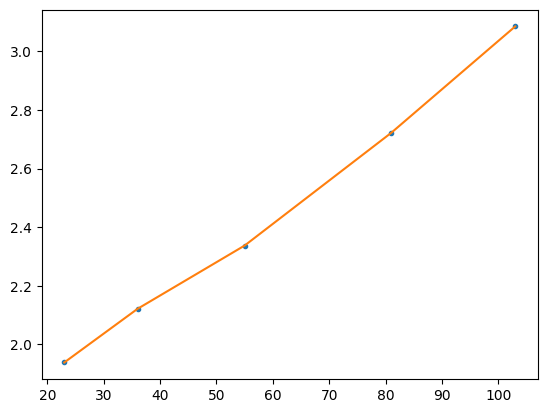

In [65]:
# import matplotlib.pyplot as plt
# import numpy as np
  
# x = [west1i, west2i, west3i, west4i, west5i]
# y = [w1_head, w2_head, w3_head, w4_head, w5_head]
# z1 = np.polyfit(x, y, 4) #用3次多项式拟合，输出系数从高到0
# funcWest_i = np.poly1d(z1) #使用次数合成多项式
# y_pre = funcWest_i(x)
# print("西边的5个坐标是：重点关注i")
# print(west1i, west1j)
# print(west2i, west2j)
# print(west3i, west3j)
# print(west4i, west4j)
# print(west5i, west5j)

# plt.plot(x,y,'.')
# plt.plot(x,y_pre)
# plt.show()



东边的5个坐标是：重点关注i
183 216
160 226
139 248
111 262
84 253


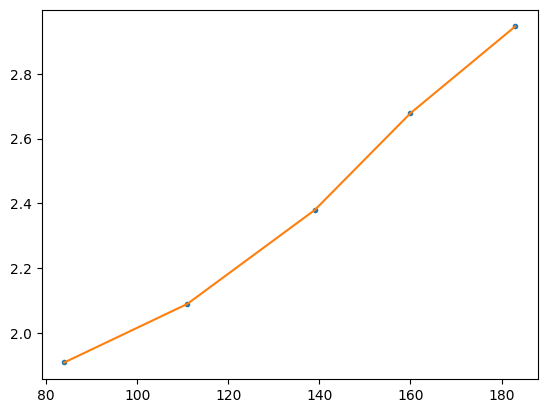

In [66]:
# x = [east1i, east2i, east3i, east4i, east5i]
# y = [e1_head, e2_head, e3_head, e4_head, e5_head]
# z1 = np.polyfit(x, y, 4) #用3次多项式拟合，输出系数从高到0
# funcEast_i = np.poly1d(z1) #使用次数合成多项式
# y_pre = funcEast_i(x)
# print("东边的5个坐标是：重点关注i")
# print(east1i, east1j)
# print(east2i, east2j)
# print(east3i, east3j)
# print(east4i, east4j)
# print(east5i, east5j)

  
# plt.plot(x,y,'.')
# plt.plot(x,y_pre)
# plt.show()

南边的5个坐标是：重点关注j
112 39
126 71
144 118
166 168
176 185


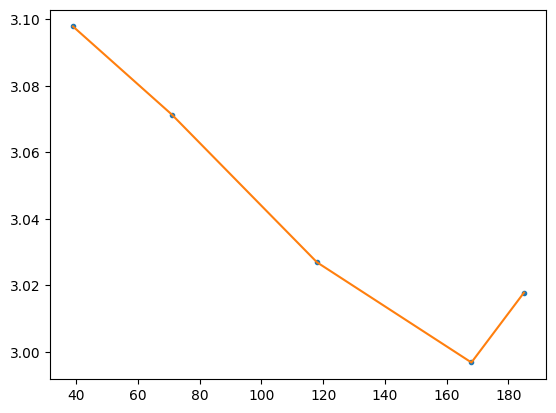

In [67]:
# x = [south1j, south2j, south3j, south4j, south5j]
# y = [s1_head, s2_head, s3_head, s4_head, s5_head]
# z1 = np.polyfit(x, y, 4) #用3次多项式拟合，输出系数从高到0
# funcSouth_j = np.poly1d(z1) #使用次数合成多项式
# y_pre = funcSouth_j(x)
# print("南边的5个坐标是：重点关注j")
# print(south1i, south1j)
# print(south2i, south2j)
# print(south3i, south3j)
# print(south4i, south4j)
# print(south5i, south5j)

# plt.plot(x,y,'.')
# plt.plot(x,y_pre)
# plt.show()

北边的5个坐标是：重点关注j
61 243
51 212
44 180
37 151
31 125


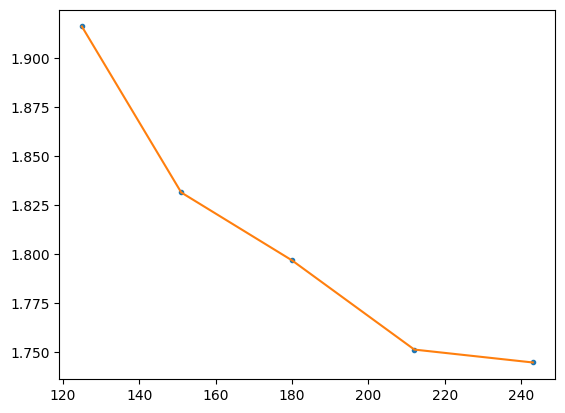

In [68]:
# x = [north1j, north2j, north3j, north4j, north5j]
# y = [n1_head, n2_head, n3_head, n4_head, n5_head]
# z1 = np.polyfit(x, y, 4) #用3次多项式拟合，输出系数从高到0
# funcNorth_j = np.poly1d(z1) #使用次数合成多项式
# y_pre = funcNorth_j(x)

# print("北边的5个坐标是：重点关注j")
# print(north1i, north1j)
# print(north2i, north2j)
# print(north3i, north3j)
# print(north4i, north4j)
# print(north5i, north5j)
# plt.plot(x,y,'.')
# plt.plot(x,y_pre)
# plt.show()

# 控制监控点的位置，端点，尽量保证是直线

In [79]:
def getHead(tmpi, tmpj):
    return head[29, 0, tmpi-1, tmpj-1] 

## 左

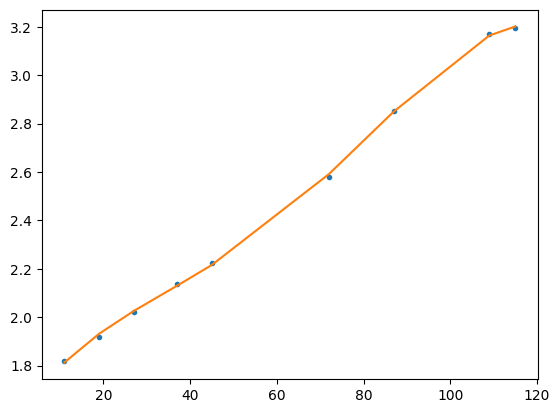

In [154]:
x = [11, 19, 27, 37, 45, 72, 87, 109, 115]
y = [getHead(11, 112), getHead(19, 104), getHead(27, 95), getHead(37, 84), getHead(45, 75), getHead(72, 49), getHead(87, 38), getHead(109, 21), getHead(115, 15)]
z1 = np.polyfit(x, y, 4) #用3次多项式拟合，输出系数从高到0
funcLeft1 = np.poly1d(z1) #使用次数合成多项式
y_pre = funcLeft1(x)

plt.plot(x,y,'.')
plt.plot(x,y_pre)
plt.show()

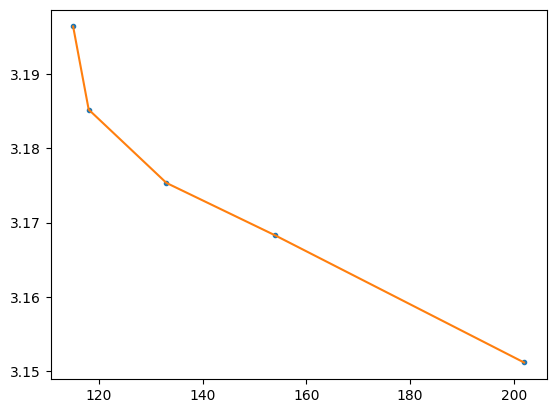

In [152]:
x = [115, 118, 133, 154, 202]
# y = [getHead(115, 15), getHead(115, 15), getHead(115, 15), getHead(115, 15), getHead(115, 15)]
y = [getHead(115, 15), getHead(118, 37), getHead(133, 71), getHead(154, 120), getHead(202, 215)]
z1 = np.polyfit(x, y, 4) #用3次多项式拟合，输出系数从高到0
funcLeft2 = np.poly1d(z1) #使用次数合成多项式
y_pre = funcLeft2(x)

plt.plot(x,y,'.')
plt.plot(x,y_pre)
plt.show()

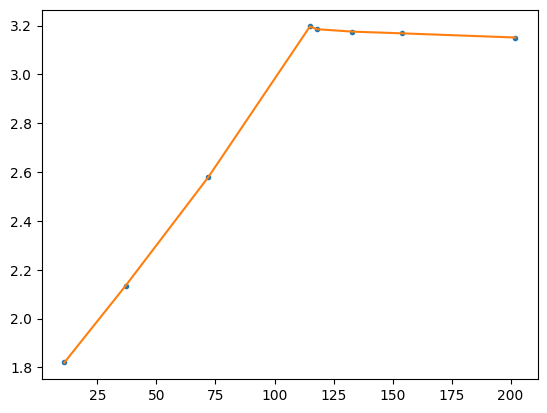

In [98]:
# x = [11, 37, 72, 115, 118, 133, 154, 202]
# y = [getHead(11, 112), getHead(37, 84), getHead(72, 49), getHead(115, 15), getHead(118, 37), getHead(133, 71), getHead(154, 120), getHead(202, 215)]
# z1 = np.polyfit(x, y, 7) #用3次多项式拟合，输出系数从高到0
# funcLeft = np.poly1d(z1) #使用次数合成多项式
# y_pre = funcLeft(x)

# plt.plot(x,y,'.')
# plt.plot(x,y_pre)
# plt.show()

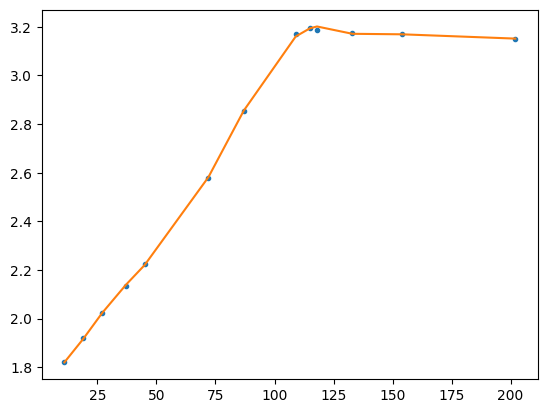

In [150]:
x = [11, 19, 27, 37, 45, 72, 87, 109, 115, 118, 133, 154, 202]
y = [getHead(11, 112), getHead(19, 104), getHead(27, 95), getHead(37, 84), getHead(45, 75), getHead(72, 49), getHead(87, 38), getHead(109, 21), getHead(115, 15), getHead(115, 15), getHead(115, 15), getHead(115, 15), getHead(115, 15)]
z1 = np.polyfit(x, y, 7) #用3次多项式拟合，输出系数从高到0
funcLeft3 = np.poly1d(z1) #使用次数合成多项式
y_pre = funcLeft3(x)

plt.plot(x,y,'.')
plt.plot(x,y_pre)
plt.show()

## 右

/home/nandahgy/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


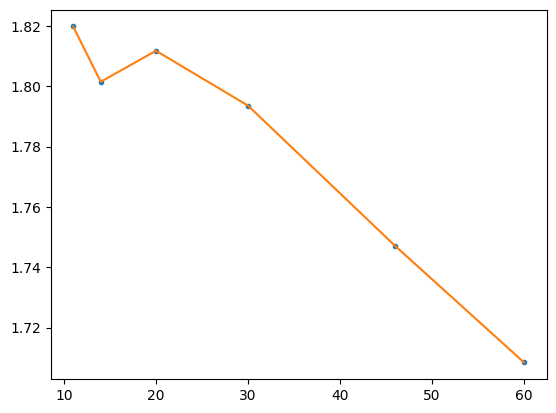

In [162]:
x = [11, 14, 20, 30, 46, 60]
y = [getHead(11, 112), getHead(14, 117), getHead(20, 119), getHead(30, 136), getHead(46, 195), getHead(60, 247)]
z1 = np.polyfit(x, y, 6) #用3次多项式拟合，输出系数从高到0
funcRight1 = np.poly1d(z1) #使用次数合成多项式
y_pre = funcRight1(x)

plt.plot(x,y,'.')
plt.plot(x,y_pre)
plt.show()

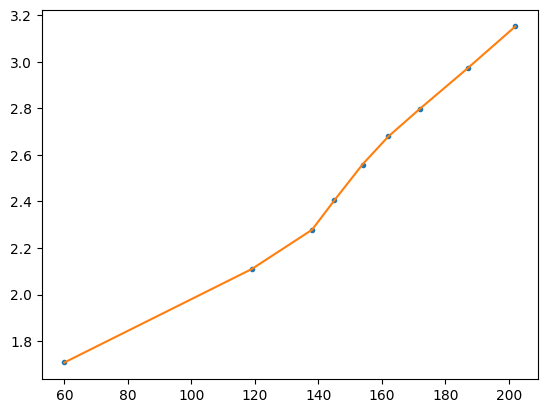

In [163]:
x = [60, 119, 138, 145, 154, 162, 172, 187, 202]
y = [getHead(60, 247), getHead(119, 270), getHead(138, 262), getHead(145, 252), getHead(154, 241), getHead(162, 232), getHead(172, 228), getHead(187, 221), getHead(202, 215)]
z2 = np.polyfit(x, y, 6) #用3次多项式拟合，输出系数从高到0
funcRight2 = np.poly1d(z2) #使用次数合成多项式
y_pre = funcRight2(x)

plt.plot(x,y,'.')
plt.plot(x,y_pre)
plt.show()

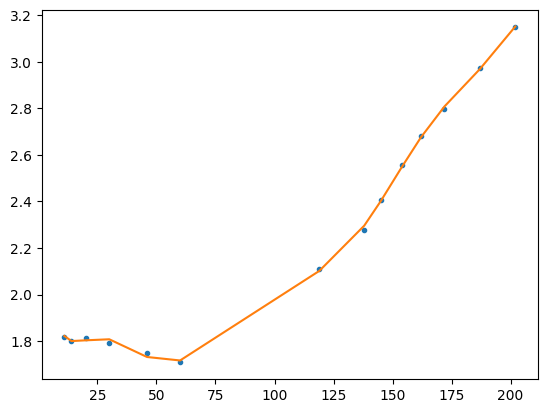

In [142]:
x = [11, 14, 20, 30, 46, 60, 119, 138, 145, 154, 162, 172, 187, 202]
y = [getHead(11, 112), getHead(14, 117), getHead(20, 119), getHead(30, 136), getHead(46, 195), getHead(60, 247), getHead(119, 270), getHead(138, 262), getHead(145, 252), getHead(154, 241), getHead(162, 232), getHead(172, 228), getHead(187, 221), getHead(202, 215)]
z1 = np.polyfit(x, y, 9) #用3次多项式拟合，输出系数从高到0
funcRight3 = np.poly1d(z1) #使用次数合成多项式
y_pre = funcRight3(x)

plt.plot(x,y,'.')
plt.plot(x,y_pre)
plt.show()

# (不准)3. 据监测点数据进行模拟:南北(无河流)

需要在 def build_model，def plot_results 的时候，把riv那个字段删掉

In [201]:
# Filename
sim_ws = 'simulation_1028_B'
sim_name = 'model'          # 模拟总名称
gwfname = "gwf_" + sim_name # 渗流模型名称
gwtname = "gwt_" + sim_name # 溶质运移模型名称

# 边界条件: # Boundary conditions
# wel_spd 井
wel_spd = []
qwell = 0
cwell = 100.0
laytmp = 2
directions = [[-1,-1],[-1,0],[-1,1], \
              [0,-1],[0,0],[0,1], \
              [1,-1],[1,0],[1,1]]
for dx, dy in directions:
      wel_loc = (laytmp, pollutionR + dx, pollutionC + dy)
      wel_spd.append([wel_loc, qwell, cwell])
wel_spd = {0: wel_spd}

# 时间离散化参数:
# Temporal discretization
# 时间离散化参数:
nper = 1
tdis_ds = [(100.0, 10, 1.0)]

chd_spd = []
cnt = 0

for k in np.arange(nlay): 
      for i in np.arange(nrow):
            for j in np.arange(ncol): # 西边
                  if idomain[k][i][j] == 1: # i <= 103 可以把south过滤掉
                        # chd_spd.append([(k, i, j), funcLeft3(i), 100.0])  #(l, r, c),head, conc
                        # cnt += 1
                        # break
                        if i < 115:
                              chd_spd.append([(k, i, j), funcLeft1(i+1), 100.0])  #(l, r, c),head, conc
                              cnt += 1
                              break
                        else:
                              chd_spd.append([(k, i, j), funcLeft2(i+1), 100.0])  #(l, r, c),head, conc
                              cnt += 1
                              break
            for j in np.arange(ncol-1,-1,-1):  # 东边
                  if idomain[k][i][j] == 1: # i >= 84 可以把north过滤掉
                        # chd_spd.append([(k, i, j), funcRight3(i), 100.0])  #(l, r, c),head, conc
                        # cnt += 1
                        # break
                        if i < 60:
                              chd_spd.append([(k, i, j), funcRight1(i+1), 100.0])  #(l, r, c),head, conc
                              cnt += 1
                              break
                        else:
                              chd_spd.append([(k, i, j), funcRight2(i+1), 100.0])  #(l, r, c),head, conc
                              cnt += 1
                              break

# for k in np.arange(4): # 东西两侧分别指定，nlay
#       for i in np.arange(nrow):
#             for j in np.arange(ncol): # 西
#                   if idomain[k][i][j] == 1:
#                         chd_spd.append([(k, i, j), chd[k, i, j], 100.0])  #(l, r, c),head, conc
#                         break
#             for j in np.arange(ncol-1,-1,-1): # 东
#                   if idomain[k][i][j] == 1:
#                         chd_spd.append([(k, i, j), chd[k, i, j], 100.0])  #(l, r, c),head, conc
#                         break
chd_spd_dic = {0: chd_spd}
cnt

1536

In [202]:


# chd_spd = []
# cnt = 0
# for k in np.arange(1): 
#     for j in np.arange(ncol): 
#         for i in np.arange(nrow): # 北边
#             if idomain[k][i][j] == 1 and j >= 125: # j >= 125 可以把west过滤掉
#               chd_spd.append([(k, i, j), funcSouth_j(j), 100.0]) #(l, r, c),head, conc
#               cnt += 1
#               break
#         for i in np.arange(nrow-1,-1,-1): # 南边
#             if idomain[k][i][j] == 1 and j <= 185: # j <= 185 可以把east过滤掉
#               chd_spd.append([(k, i, j), funcNorth_j(j), 100.0]) #(l, r, c),head, conc
#               cnt += 1
#               break
# chd_spd = {0: chd_spd}
# cnt

# RIV
# riv_sp_0 = [] # 应力周期 0
# riv_spd = {0: riv_sp_0}

import flopy
def build_model():
    sim = flopy.mf6.MFSimulation(
        sim_name=sim_name, sim_ws=sim_ws, exe_name='/usr/local/lib/modflow/mf6'
    )
    print("sim_name:",sim_name)
    print("sim_ws:",sim_ws)

    # 时间离散化
    flopy.mf6.ModflowTdis(
        sim, nper=nper, perioddata=tdis_ds, time_units=time_units
    )

    # GWF
    gwf = flopy.mf6.ModflowGwf(
        sim,
        modelname=gwfname,
        save_flows=True,
        model_nam_file="{}.nam".format(gwfname),
    )
    print("gwfname:",gwfname)

    # 渗流模型求解参数
    imsgwf = flopy.mf6.ModflowIms(
        sim,
        print_option="SUMMARY",
        outer_dvclose=hclose,
        outer_maximum=nouter,
        under_relaxation="NONE",
        inner_maximum=ninner,
        inner_dvclose=hclose,
        rcloserecord=rclose,
        linear_acceleration="CG",
        scaling_method="NONE",
        reordering_method="NONE",
        relaxation_factor=relax,
        filename="{}.ims".format(gwfname),
    )
    sim.register_ims_package(imsgwf, [gwf.name])

    # 离散化
    dis6 = flopy.mf6.ModflowGwfdis(
        gwf,
        length_units=length_units,
        xorigin=xorigin,
        yorigin=yorigin,
        nlay=nlay,
        nrow=nrow,
        ncol=ncol,
        delr=delr,
        delc=delc,
        top=top,
        botm=botm,
        idomain=idomain,
        filename="{}.dis".format(gwfname),
    )
    print("nlay:",nlay)
    print("nrow:",nrow)
    print("ncol:",ncol)
    print("delr:",delr)
    print("delc:",delc)
    print("top:",top)
    print("botm:",botm)

    # 含水层特性
    flopy.mf6.ModflowGwfnpf(
        gwf,
        save_flows=False,
        icelltype=icelltype,
        k=k11,
        # k22=1.0,
        # k22overk=k22overk,
        # k33overk=k33overk,
        k33=k33,
        save_specific_discharge=True,
        filename="{}.npf".format(gwfname),
    )
    print("icelltype:",icelltype)
    print("k11:",k11)
    print("k33:",k33)
    

    # 初始水头
    flopy.mf6.ModflowGwfic(
        gwf, strt=strt, filename="{}.ic".format(gwfname)
    )
    print("strt:",strt[0,100,100])
    print("strt:",strt[1,100,100])
    print("strt:",strt[2,100,100])
    print("strt:",strt[3,100,100])

    # 指定水头边界
    flopy.mf6.ModflowGwfchd(
        gwf,
        maxbound=len(chd_spd_dic),
        stress_period_data=chd_spd_dic,
        save_flows=False,
        auxiliary="CONCENTRATION",
        pname="CHD-1",
        filename="{}.chd".format(gwfname),
    )
    print("chd_spd:",chd_spd[0][:10])
 
    # flopy.mf6.ModflowGwfriv(
    #     gwf, 
    #     stress_period_data=riv_spd
    # )

    # 井边界
    flopy.mf6.ModflowGwfwel(
        gwf,
        print_input=True,
        print_flows=True,
        stress_period_data=wel_spd,
        save_flows=False,
        auxiliary="CONCENTRATION",
        pname="WEL-1",
        filename="{}.wel".format(gwfname),
    )
    print("wel_spd:",wel_spd)

    # 补给recharge
    flopy.mf6.ModflowGwfrcha(
        gwf,
        recharge=rch,
        filename="{}.rch".format(gwfname),
    )
    print("rch:",rch[100,100])

    # 蒸发
    flopy.mf6.ModflowGwfevta(
        gwf,
        surface=et_surf,
        rate=et_rat,
        depth=et_dep,
        filename="{}.evt".format(gwfname),
    )
    print("et_surf:",et_surf[100,100])
    print("et_rat:",et_rat[100,100])
    print("et_dep:",et_dep[100,100])

    # 输出控制
    flopy.mf6.ModflowGwfoc(
        gwf,
        head_filerecord="{}.hds".format(gwfname),
        budget_filerecord="{}.bud".format(gwfname),
        headprintrecord=[
            ("COLUMNS", 100, "WIDTH", 150, "DIGITS", 6, "GENERAL")
        ],
        saverecord=[("HEAD", "ALL"), ("BUDGET", "ALL")],
        printrecord=[("HEAD", "ALL"), ("BUDGET", "ALL")],
    )

    # GWT
    gwt = flopy.mf6.ModflowGwt(
        sim,
        modelname=gwtname,
        save_flows=True,
        model_nam_file="{}.nam".format(gwtname),
    )

    # 溶质运移模型求解参数
    imsgwt = flopy.mf6.ModflowIms(
        sim,
        print_option="SUMMARY",
        outer_dvclose=hclose,
        outer_maximum=nouter,
        under_relaxation="NONE",
        inner_maximum=ninner,
        inner_dvclose=hclose,
        rcloserecord=rclose,
        linear_acceleration="BICGSTAB",
        scaling_method="NONE",
        reordering_method="NONE",
        relaxation_factor=relax,
        filename="{}.ims".format(gwtname),
    )
    sim.register_ims_package(imsgwt, [gwt.name])

    # 离散化
    flopy.mf6.ModflowGwtdis(
        gwt,
        nlay=nlay,
        nrow=nrow,
        ncol=ncol,
        delr=delr,
        delc=delc,
        top=top,
        botm=botm,
        idomain=idomain,
        filename="{}.dis".format(gwtname),
    )

    # 初始浓度
    flopy.mf6.ModflowGwtic(
        gwt, strt=sconc, filename="{}.ic".format(gwtname)
    )

    # 对流
    flopy.mf6.ModflowGwtadv(
        gwt, scheme="UPSTREAM", filename="{}.adv".format(gwtname)
    )

    # 弥散
    flopy.mf6.ModflowGwtdsp(
        gwt,
        alh=al,
        ath1=ath1,
        atv=atv,
        filename="{}.dsp".format(gwtname),
    )

    # 化学反应 (等同于 MT3DMS 的 reaction)
    flopy.mf6.ModflowGwtmst(
        gwt,
        porosity=porosity,
        first_order_decay=False,
        decay=None,
        decay_sorbed=None,
        sorption=None,
        bulk_density=None,
        distcoef=None,
        filename="{}.mst".format(gwtname),
    )

    # 源汇项
    sourcerecarray = [
        ("WEL-1", "AUX", "CONCENTRATION"),
        ("CHD-1", "AUX", "CONCENTRATION"),
    ]
    flopy.mf6.ModflowGwtssm(
        gwt, sources=sourcerecarray, filename="{}.ssm".format(gwtname)
    )

    # 输出控制
    flopy.mf6.ModflowGwtoc(
        gwt,
        budget_filerecord="{}.cbc".format(gwtname),
        concentration_filerecord="{}.ucn".format(gwtname),
        concentrationprintrecord=[
            ("COLUMNS", 10, "WIDTH", 15, "DIGITS", 6, "GENERAL")
        ],
        saverecord=[("CONCENTRATION", "ALL"), ("BUDGET", "ALL")],
        printrecord=[("CONCENTRATION", "ALL"), ("BUDGET", "ALL")],
    )

    # GWF 和 GWT 之间的交换
    flopy.mf6.ModflowGwfgwt(
        sim,
        exgtype="GWF6-GWT6",
        exgmnamea=gwfname,
        exgmnameb=gwtname,
        filename="{}.gwfgwt".format(sim_name),
    )
    return sim, gwf, gwt, dis6


sim, gwf1, gwt, dis6 = build_model()
sim.write_simulation(silent = True)

success, buff = sim.run_simulation(silent = True)
if not success:
    raise Exception("MODFLOW 6 did not terminate normally.")


head = gwf.oc.output.head().get_alldata()
concentration = gwt.oc.output.concentration().get_alldata()


sim_name: model
sim_ws: simulation_1028_B
gwfname: gwf_model
nlay: 4
nrow: 213
ncol: 283
delr: 49.84594
delc: 49.82019
top: [[4.69283342 4.69255257 4.69226456 ... 5.01899052 5.01942301 5.01983881]
 [4.69307709 4.69280005 4.69251633 ... 5.02000856 5.0204258  5.02082682]
 [4.69332266 4.69304991 4.69277    ... 5.02101517 5.02141762 5.02180433]
 ...
 [4.72964048 4.72994184 4.7302537  ... 4.95594215 4.95694733 4.95793676]
 [4.73020363 4.73051167 4.73083019 ... 4.95507908 4.95608139 4.95706892]
 [4.7307682  4.73108292 4.73140764 ... 4.95423317 4.9552331  4.95621824]]
botm: [[[ -2.          -2.          -2.         ...  -2.          -2.
    -2.        ]
  [ -2.          -2.          -2.         ...  -2.          -2.
    -2.        ]
  [ -2.          -2.          -2.         ...  -2.          -2.
    -2.        ]
  ...
  [ -2.          -2.          -2.         ...  -2.          -2.
    -2.        ]
  [ -2.          -2.          -2.         ...  -2.          -2.
    -2.        ]
  [ -2.        

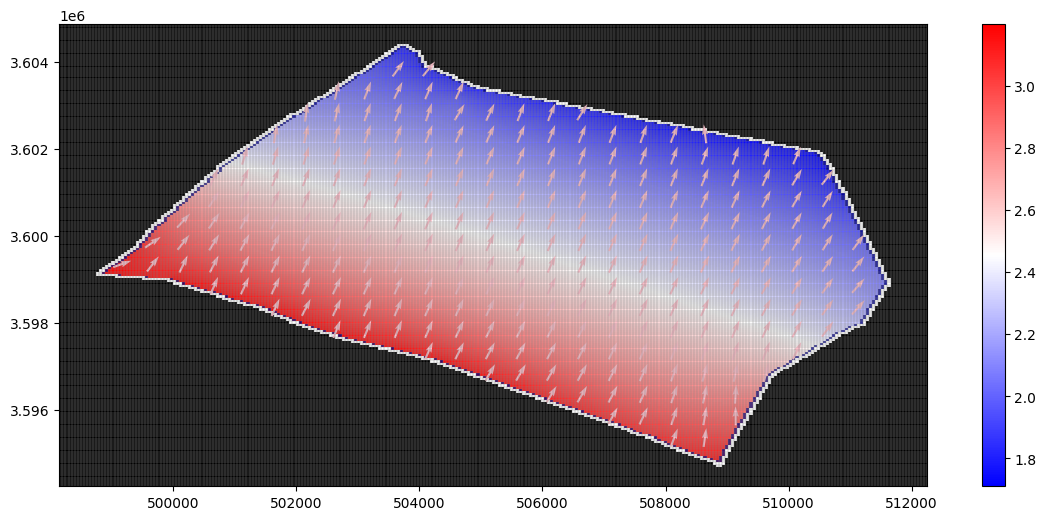

In [203]:
import matplotlib.pyplot as plt
def plot_results(model, result):
    fig = plt.figure(figsize = (14, 6))
    ax = fig.add_subplot(1, 1, 1)
    pmv = flopy.plot.PlotMapView(model = model, ax = ax, layer = 0)
    pmv.plot_grid(ax = ax, color = ".5", alpha = 0.2) # 绘制网格
    
    # 网格填充颜色
    plot_array = pmv.plot_array(result, masked_values = [1e30], cmap = 'bwr')
    plt.colorbar(plot_array)
    # riv = pmv.plot_bc("RIV", alpha = 0.5)
    qm = pmv.plot_bc("CHD", alpha = 0.5)
    
    # 绘制等值线
    plot_contour_array = pmv.contour_array(result, masked_values = [1e30], cmap = "brg", linestyles="--")
    plt.clabel(plot_contour_array, fmt = r'%.2f') # 绘制等值线上文本标注
    # plt.colorbar(plot_contour_array)              # 等值线图例
    
    pmv.plot_bc(package = model.get_package("WEL-1"), color = 'green')
    pmv.plot_inactive(ibound = model.modelgrid.idomain, color_noflow = 'black')
    
    # 绘制水流的方向 (粉红色箭头)
    spdis = gwf.oc.output.budget().get_data(text = 'DATA-SPDIS')[0]
    qx, qy, qz = flopy.utils.postprocessing.get_specific_discharge(spdis, gwf)
    pmv.plot_vector(qx, qy, normalize = True, istep = 10, jstep = 10, color = "pink")

# plot_results(model = gwf1, result = chd[0])
plot_results(model = gwf1, result = head[9,0])

# (不准)4. 据监测点数据进行模拟:东西(无河流)

sim_name: model
sim_ws: simulation_1027_E
gwfname: gwf_model
nlay: 4
nrow: 213
ncol: 283
delr: 49.84594
delc: 49.82019
top: [[4.69283342 4.69255257 4.69226456 ... 5.01899052 5.01942301 5.01983881]
 [4.69307709 4.69280005 4.69251633 ... 5.02000856 5.0204258  5.02082682]
 [4.69332266 4.69304991 4.69277    ... 5.02101517 5.02141762 5.02180433]
 ...
 [4.72964048 4.72994184 4.7302537  ... 4.95594215 4.95694733 4.95793676]
 [4.73020363 4.73051167 4.73083019 ... 4.95507908 4.95608139 4.95706892]
 [4.7307682  4.73108292 4.73140764 ... 4.95423317 4.9552331  4.95621824]]
botm: [[[ -2.          -2.          -2.         ...  -2.          -2.
    -2.        ]
  [ -2.          -2.          -2.         ...  -2.          -2.
    -2.        ]
  [ -2.          -2.          -2.         ...  -2.          -2.
    -2.        ]
  ...
  [ -2.          -2.          -2.         ...  -2.          -2.
    -2.        ]
  [ -2.          -2.          -2.         ...  -2.          -2.
    -2.        ]
  [ -2.        

/usr/local/lib/python3.9/dist-packages/flopy/plot/map.py:243: UserWarning: No contour levels were found within the data range.
  contour_set = ax.tricontour(triang, plotarray, **kwargs)


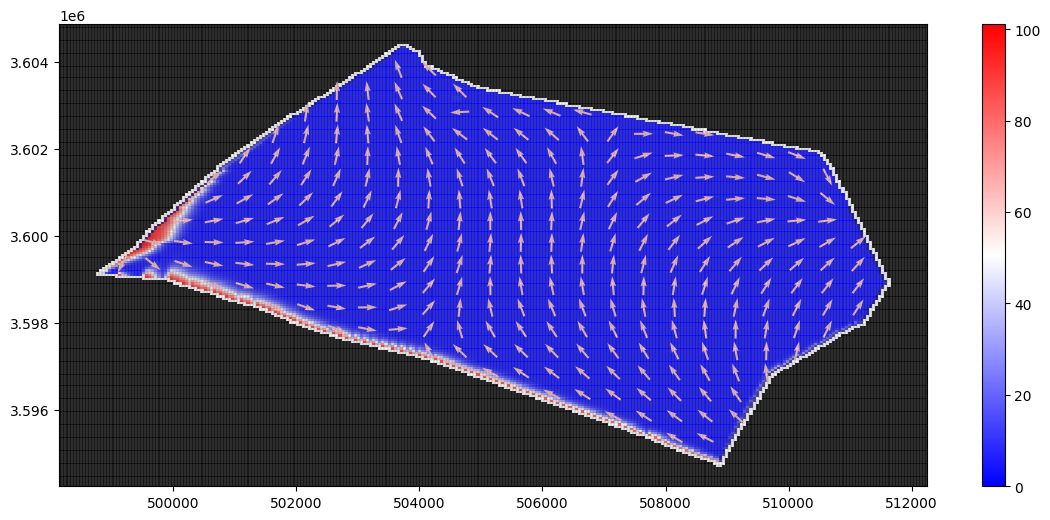

In [ ]:
# Filename
sim_ws = 'simulation_1027_E'
sim_name = 'model'          # 模拟总名称
gwfname = "gwf_" + sim_name # 渗流模型名称
gwtname = "gwt_" + sim_name # 溶质运移模型名称



# 时间离散化参数:
# Temporal discretization
# 时间离散化参数:
nper = 3
tdis_ds = [(100.0, 10, 1.0), (900.0, 10, 1.0), (9000.0, 10, 1.0)]

chd_spd = []
cnt = 0
for k in np.arange(1): 
    for i in np.arange(nrow):
        for j in np.arange(ncol): # 西边
            if idomain[k][i][j] == 1 and i <= 103: # i <= 103 可以把south过滤掉
              chd_spd.append([(k, i, j), funcWest_i(i), 100.0])  #(l, r, c),head, conc
              cnt += 1
              break
        for j in np.arange(ncol-1,-1,-1):  # 东边
            if idomain[k][i][j] == 1 and i >= 84: # i >= 84 可以把north过滤掉
              chd_spd.append([(k, i, j), funcEast_i(i), 100.0])  #(l, r, c),head, conc
              cnt += 1
              break
chd_spd = {0: chd_spd}
cnt

# chd_spd = []
# cnt = 0
# for k in np.arange(1): 
#     for j in np.arange(ncol): 
#         for i in np.arange(nrow): # 北边
#             if idomain[k][i][j] == 1 and j >= 125: # j >= 125 可以把west过滤掉
#               chd_spd.append([(k, i, j), funcSouth_j(j), 100.0]) #(l, r, c),head, conc
#               cnt += 1
#               break
#         for i in np.arange(nrow-1,-1,-1): # 南边
#             if idomain[k][i][j] == 1 and j <= 185: # j <= 185 可以把east过滤掉
#               chd_spd.append([(k, i, j), funcNorth_j(j), 100.0]) #(l, r, c),head, conc
#               cnt += 1
#               break
# chd_spd = {0: chd_spd}
# cnt


sim, gwf, gwt, dis6 = build_model()
sim.write_simulation(silent = True)

success, buff = sim.run_simulation(silent = True)
if not success:
    raise Exception("MODFLOW 6 did not terminate normally.")

plot_results(model = gwf, result = concentration[29,0])




# (不太准)5. 就根据20个监控点进行计算

sim_name: model
sim_ws: simulation_1027_F
gwfname: gwf_model
nlay: 4
nrow: 213
ncol: 283
delr: 49.84594
delc: 49.82019
top: [[4.69283342 4.69255257 4.69226456 ... 5.01899052 5.01942301 5.01983881]
 [4.69307709 4.69280005 4.69251633 ... 5.02000856 5.0204258  5.02082682]
 [4.69332266 4.69304991 4.69277    ... 5.02101517 5.02141762 5.02180433]
 ...
 [4.72964048 4.72994184 4.7302537  ... 4.95594215 4.95694733 4.95793676]
 [4.73020363 4.73051167 4.73083019 ... 4.95507908 4.95608139 4.95706892]
 [4.7307682  4.73108292 4.73140764 ... 4.95423317 4.9552331  4.95621824]]
botm: [[[ -2.          -2.          -2.         ...  -2.          -2.
    -2.        ]
  [ -2.          -2.          -2.         ...  -2.          -2.
    -2.        ]
  [ -2.          -2.          -2.         ...  -2.          -2.
    -2.        ]
  ...
  [ -2.          -2.          -2.         ...  -2.          -2.
    -2.        ]
  [ -2.          -2.          -2.         ...  -2.          -2.
    -2.        ]
  [ -2.        

/usr/local/lib/python3.9/dist-packages/flopy/plot/map.py:243: UserWarning: No contour levels were found within the data range.
  contour_set = ax.tricontour(triang, plotarray, **kwargs)


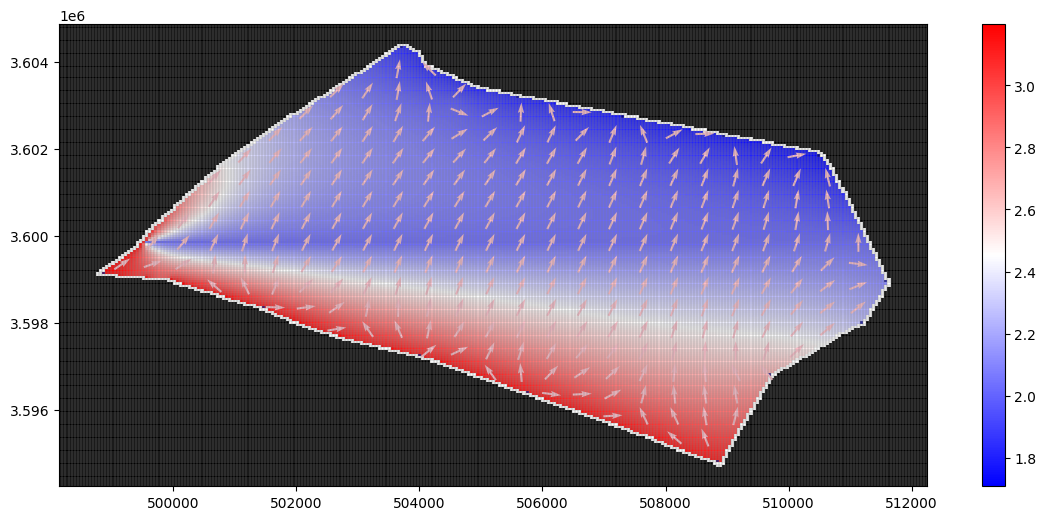

In [ ]:
# Filename
sim_ws = 'simulation_1027_F'
sim_name = 'model'          # 模拟总名称
gwfname = "gwf_" + sim_name # 渗流模型名称
gwtname = "gwt_" + sim_name # 溶质运移模型名称

# 时间离散化参数:
# Temporal discretization
# 时间离散化参数:
nper = 3
tdis_ds = [(100.0, 10, 1.0), (900.0, 10, 1.0), (9000.0, 10, 1.0)]

chd_spd = []
# chd_spd.append([(0, west1i, west1j), w1_head, 100.0])  #(l, r, c),head, conc
# chd_spd.append([(0, west2i, west2j), w2_head, 100.0])  #(l, r, c),head, conc
# chd_spd.append([(0, west3i, west3j), w3_head, 100.0])  #(l, r, c),head, conc
# chd_spd.append([(0, west4i, west4j), w4_head, 100.0])  #(l, r, c),head, conc
# chd_spd.append([(0, west5i, west5j), w5_head, 100.0])  #(l, r, c),head, conc
# chd_spd.append([(0, south1i, south1j), s1_head, 100.0])  #(l, r, c),head, conc
# chd_spd.append([(0, south2i, south2j), s2_head, 100.0])  #(l, r, c),head, conc
# chd_spd.append([(0, south3i, south3j), s3_head, 100.0])  #(l, r, c),head, conc
# chd_spd.append([(0, south4i, south4j), s4_head, 100.0])  #(l, r, c),head, conc
# chd_spd.append([(0, south5i, south5j), s5_head, 100.0])  #(l, r, c),head, conc
# chd_spd.append([(0, east1i, east1j), e1_head, 100.0])  #(l, r, c),head, conc
# chd_spd.append([(0, east2i, east2j), e2_head, 100.0])  #(l, r, c),head, conc
# chd_spd.append([(0, east3i, east3j), e3_head, 100.0])  #(l, r, c),head, conc
# chd_spd.append([(0, east4i, east4j), e4_head, 100.0])  #(l, r, c),head, conc
# chd_spd.append([(0, east5i, east5j), e5_head, 100.0])  #(l, r, c),head, conc
# chd_spd.append([(0, north1i, north1j), n1_head, 100.0])  #(l, r, c),head, conc
# chd_spd.append([(0, north2i, north2j), n2_head, 100.0])  #(l, r, c),head, conc
# chd_spd.append([(0, north3i, north3j), n3_head, 100.0])  #(l, r, c),head, conc
# chd_spd.append([(0, north4i, north4j), n4_head, 100.0])  #(l, r, c),head, conc
# chd_spd.append([(0, north5i, north5j), n5_head, 100.0])  #(l, r, c),head, conc
# for k in np.arange(1): 
#     for j in np.arange(ncol): 
#         if 125 < j < 243:
#             for i in np.arange(nrow): # 北边
#                 if idomain[k][i][j] == 1: # j >= 125 可以把west过滤掉
#                     chd_spd.append([(k, i, j), funcSouth_j(j), 100.0]) #(l, r, c),head, conc
#                     cnt += 1
#                     break
        # if 39 < j < 185:
        #     for i in np.arange(nrow-1,-1,-1): # 南边
        #         if idomain[k][i][j] == 1: # j <= 185 可以把east过滤掉
        #             chd_spd.append([(k, i, j), funcNorth_j(j), 100.0]) #(l, r, c),head, conc
        #             cnt += 1
        #             break

# for k in np.arange(1): 
#     for i in np.arange(nrow):
#         if 23 < i < 103:
#             for j in np.arange(ncol): # 西边
#                 if idomain[k][i][j] == 1: # i <= 103 可以把south过滤掉
#                     chd_spd.append([(k, i, j), funcWest_i(i), 100.0])  #(l, r, c),head, conc
#                     cnt += 1
#                     break
        # if 84 < i < 183:
        #     for j in np.arange(ncol-1,-1,-1):  # 东边
        #         if idomain[k][i][j] == 1: # i >= 84 可以把north过滤掉
        #             chd_spd.append([(k, i, j), funcEast_i(i), 100.0])  #(l, r, c),head, conc
        #             cnt += 1
        #             break
# node01_add = (121.039391,32.558394)
# node02_add = (121.022959,32.547669)
# node03_add = (121.011921,32.539955)
# node04_add = (121.002200,32.529356)
# node05_add = (120.999880,32.526534)
# node06_add = (120.996932,32.522708)
# node07_add = (120.989281,32.516938)
# node08_add = (120.996305,32.516248)
# node09_add = (121.026597,32.506026)
# node10_add = (121.043217,32.501071)
# node11_add = (121.053816,32.496995)
# node12_add = (121.06906,32.49286)
# node13_add = (121.08649,32.48370)
# node14_add = (121.09979,32.49022)
# node15_add = (121.10280,32.49624)
# node16_add = (121.11183,32.50251)
# node17_add = (121.11747,32.50715)
# node18_add = (121.12124,32.51493)
# node19_add = (121.11885,32.52208)
# node20_add = (121.11609,32.52798)
# node21_add = (121.11183,32.53901)
# node22_add = (121.09703,32.54278)
# node23_add = (121.08662,32.54541)
# node24_add = (121.07997,32.54629)
# node25_add = (121.06379,32.55030)
# node26_add = (121.05049,32.55457)


# def chd_append(node_add):
#     tmpi, tmpj, NOToutBoundFlag = WGS84_ij(gwf, node_add)
#     head = chd[0, tmpi, tmpj] 
#     if NOToutBoundFlag:
#         chd_spd.append([(0, tmpi, tmpj), head, 100.0])  #(l, r, c),head, conc

# chd_append(node01_add)
# chd_append(node02_add)
# chd_append(node03_add)
# chd_append(node04_add)
# chd_append(node05_add)
# chd_append(node06_add)
# chd_append(node07_add)
# chd_append(node08_add)
# chd_append(node09_add)
# chd_append(node10_add)
# chd_append(node11_add)
# chd_append(node12_add)
# chd_append(node13_add)
# chd_append(node14_add)
# chd_append(node15_add)
# chd_append(node16_add)
# chd_append(node17_add)
# chd_append(node18_add)
# chd_append(node19_add)
# chd_append(node20_add)
# chd_append(node21_add)
# chd_append(node22_add)
# chd_append(node23_add)
# chd_append(node24_add)
# chd_append(node25_add)
# chd_append(node26_add)




# tmpi, tmpj从GMS中读取，所以要-1
# 在实际项目中, must先在模型中定位，选取合适的点，再去现场钻孔，
# 最终结果必须赋值在边界上
def chd_append(tmpi, tmpj):
    head = chd[0, tmpi-1, tmpj-1] 
    chd_spd.append([(0, tmpi-1, tmpj-1), head, 100.0])
    
# def chd_append(tmpi, tmpj):
#     head = chd[0, tmpi-1, tmpj-1] 
#     chd_spd.append([(0, tmpi-1, tmpj-1), [head, head-1, head-2], 100.0])
    
chd_append(61, 248)
chd_append(202, 215)
chd_append(11, 112)
chd_append(115, 15)
chd_append(138, 262)
chd_append(162, 232)
chd_append(119, 270)

chd_append(43, 184)
chd_append(153, 118)
chd_append(131, 67)
chd_append(170, 153)
chd_append(34, 150)
chd_append(52, 217)



chd_spd = {0: chd_spd}

strt = chd

# chd_spd = []
# cnt = 0
# for k in np.arange(1): 
#     for j in np.arange(ncol): 
#         for i in np.arange(nrow): # 北边
#             if idomain[k][i][j] == 1 and j >= 125: # j >= 125 可以把west过滤掉
#               chd_spd.append([(k, i, j), funcSouth_j(j), 100.0]) #(l, r, c),head, conc
#               cnt += 1
#               break
#         for i in np.arange(nrow-1,-1,-1): # 南边
#             if idomain[k][i][j] == 1 and j <= 185: # j <= 185 可以把east过滤掉
#               chd_spd.append([(k, i, j), funcNorth_j(j), 100.0]) #(l, r, c),head, conc
#               cnt += 1
#               break
# chd_spd = {0: chd_spd}
# cnt


sim, gwf, gwt, dis6 = build_model()
sim.write_simulation(silent = True)

success, buff = sim.run_simulation(silent = True)
if not success:
    raise Exception("MODFLOW 6 did not terminate normally.")

plot_results(model = gwf, result = head[29,0])




# CHD 究竟怎么设置

In [ ]:
# ['00. Number of BCs',
#  '01. Use Last',
#  '02. Cell IDs',
#  '03. Name',
#  '04. Map ID',
#  '06. IFACE',
#  '07. Property']
f3 = h5py.File("/home/nandahgy/yqc_model/1-2.h5",'r')
print("Number of BCs：",list(f3['Specified Head']['00. Number of BCs']))
print("Cell IDs的数量：", list(f3['Specified Head']['02. Cell IDs'])[:10])
print("Use Last：", list(f3['Specified Head']['01. Use Last'])[:10])
print("IFACE的数量：", list(f3['Specified Head']['06. IFACE'])[:10])
# print("Map ID的数量：", len(list(f3['Specified Head']['04. Map ID'])))
print("Name的数量：", list(f3['Specified Head']['03. Name'])[:10])


nums = list(f3['Specified Head']['07. Property'])
lennums = len(nums)
print("6个nums[i]：",nums[0].shape)
for i in range(lennums):
      print(nums[i][0][:10])
# tmp2 = []
# for j in range(NLAY):
#       tmp = []
#       for i in range(NROW):
#             tmp.append(nums[i*NCOL:(1+i)*NCOL])
#       tmp2.append(tmp)
# chd = np.array(tmp2)


Number of BCs： [3768]
Cell IDs的数量： [45338, 105167, 164996, 224825, 45597, 105426, 165255, 225084, 45596, 105425]
Use Last： [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
IFACE的数量： [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Name的数量： [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
6个nums[i]： (3768, 60)
[1.94965473 1.80050767 1.94965473 1.80050767 1.94965473 1.80050767
 1.94965473 1.80050767 1.94965473 1.80050767]
[1.80050767 1.94965473 1.80050767 1.94965473 1.80050767 1.94965473
 1.80050767 1.94965473 1.80050767 1.94965473]
[80.79133621 80.79133621 80.79133621 80.79133621 80.79133621 80.79133621
 80.79133621 80.79133621 80.79133621 80.79133621]
[80.79133621 80.79133621 80.79133621 80.79133621 80.79133621 80.79133621
 80.79133621 80.79133621 80.79133621 80.79133621]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
